# [BIX Tecnologia] Desafio Técnico - Vaga de Cientista de Dados

João Vitor de Oliveira Ribas

jvoribas@gmail.com

2024

### Introduction

As part of the selection process for the Junior Data Scientist position at Bix Tecnologia, we present below a possible solution for the proposed technical challenge.

To facilitate the analysis of the project, considering that there are numerous other projects to be evaluated, the conclusion and the 16 questions asked at the end of the PDF challenge will be answered at the beginning. The justification of the answers can be found throughout the code.

### Conclusion

In this study, we adjusted and evaluated several classification models to predict the need for maintenance in the truck air system, with the goal of reducing maintenance costs. Five models were tested (Logistic Regression, Support Vector Machine, KNN Classification, Random Forest, and LGBM), with the KNN Classification (PCA=95%) showing the best performance, with an expected cost of $25,375 and an AUC-ROC of 0.92.

Due to the high imbalance of the data, we observed that traditional metrics such as accuracy, precision, and f1-score were not effective for comparing the models. However, by using the Confusion Matrix, we were able to identify the model that best minimizes the maintenance cost of the truck air system. Although we tested various hyperparameter optimization techniques, none resulted in significant improvements.

It is essential to recognize that all these models are preliminary. To achieve practical implementation, several improvements are still needed, such as increasing the quantity and quality of data and developing an efficient method for hyperparameter optimization. In summary, we concluded that the objective was achieved, demonstrating the feasibility of applying a classification model to reduce the maintenance costs of the air system.

## Table of models, Expected Cost and AUC-ROC

|  Model |   EC ($)  | AUC-ROC |
|--------|-----------|---------|
| LG_75  | 38120     | 0,92    |
| LG_80  | 37980     | 0,92    |
| LG_85  | 35505     | 0,93    |
| LG_90  | 36355     | 0,92    |
| LG_95  | 33900     | 0,93    |
| SVM_75 | 36425     | 0,92    |
| SVM_80 | 33910     | 0,93    |
| SVM_85 | 35490     | 0,93    |
| SVM_90 | 36370     | 0,92    |
| SVM_95 | 34695     | 0,93    |
| KNN_75 | 28780     | 0,94    |
| KNN_80 | 30640     | 0,94    |
| KNN_85 | 28790     | 0,94    |
| KNN_90 | 27720     | 0,95    |
| KNN_95 | 25375     | 0,95    |
| RF_75  | 38700     | 0,92    |
| RF_80  | 34835     | 0,93    |
| RF_85  | 38795     | 0,92    |
| RF_90  | 40540     | 0,91    |
| RF_95  | 39480     | 0,92    |
| LGBM_75| 32810     | 0,93    |
| LGBM_80| 32020     | 0,94    |
| LGBM_85| 32245     | 0,94    |
| LGBM_90| 32420     | 0,93    |
| LGBM_95| 32685     | 0,93    |


# Challenge Activities

**1. What steps would you take to solve this problem? Please describe as completely and clearly as possible all the steps that you see as essential for solving the problem.**

In general, this kind of project has a structure like:

1. Problem Definition

- Understand the problem and define our objective.
- Define how we're going to identify if the proposed solution accomplishes the objective.

2. Data Gathering

- Collect all the data that will be used.
- Gain a preliminary understanding of the data (target, features, data types, and any other relevant information).

3. Exploratory Data Analysis and Preprocessing

- Conduct a more detailed investigation to find patterns, outliers, data distribution, missing values, duplicates, and any other important information.
- After investigating the data, handle missing values, outliers, and duplicates.
- If needed, perform data transformations such as normalization, standardization, or scaling.
- Once the data meets the required quality, split it into training, validation, and test sets.

4. Model Selection

- Choose appropriate algorithms for the problem and create a simple model for performance comparison.

5. Model Training

- Train the models using the training data.
- Optimize their hyperparameters using grid search, random search, Bayesian search, or any other suitable method.
- Use the test data to validate the models' performance.

6. Model Evaluation

- Evaluate the models using reliable metrics and analyze their types of errors.
- Compare the performance of different models.

7. Model Interpretation

- Identify which features have the most impact on the models' results and understand how the predictions are made.

**2. Which technical data science metric would you use to solve this challenge? Ex: absolute error, RMSE, etc.**

In this problem, the confusion matrix and AUC-ROC was used as metric.

**3. Which business metric would you use to solve the challenge?**

The business metric used was the total expected cost from each model, to understand the financial impact of each model.

**4. How do technical metrics relate to the business metrics?**

The confusion matrix indicates how our model makes the right predictions, and the financial impact is directly related to this.

**5. What types of analyses would you like to perform on the customer database?**

From the data we have, building a model capable of predicting if the truck needs to go to maintenance.

**6. What techniques would you use to reduce the dimensionality of the problem?**

In this project, the PCA technique was used to reduce dimensionality.

**7. What techniques would you use to select variables for your predictive model?**

Only PCA was used.

**8. What predictive models would you use or test for this problem? Please indicate at least 3.**

Logistic Regression, SVM, KNN Classification, Random Forest, and LGBM were used.

**9. How would you rate which of the trained models is the best?**

Using the confusion matrix, we can quantify the percentage of all the predictions and then use it to calculate the total estimated cost.

**10. How would you explain the result of your model? Is it possible to know which variables are most important?**

To better understand the model and the variables, we can use SHAP and LIME, which are important model interpretation techniques.

**11. How would you assess the financial impact of the proposed model?**

Using the confusion matrix, we have all the values necessary to estimate a cost based on the initial values given (FP = $10, TP = $25, and FN = $500).

**12. What techniques would you use to perform the hyperparameter optimization of the chosen model?**

Grid Search, Random Search, and Bayesian Search were used.

**13. What risks or precautions would you present to the customer before putting this model into production?**

The first precaution is about the quality of data; it is important to ensure this to secure that the model will perform as it did during the training stage. Second, we don't know if the data has other categories (like type of truck, age, work routine, or any other information). This kind of information can be important and used to make better models because using other categories makes it possible to create a model specific to each category, resulting in a more secure model.

**14. If your predictive model is approved, how would you put it into production?**

This kind of application doesn't seem to need real-time functionality, so maybe updating the data once a day can be enough. 

**15. If the model is in production, how would you monitor it?**

It is possible to use the Kolmogorov-Smirnov test to monitor the stability of the model over time.

**16. If the model is in production, how would you know when to retrain it?**

When our metrics indicate some worsening or unexpected behavior.

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from lightgbm import LGBMClassifier
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score, roc_curve, precision_recall_curve, auc
from sklearn.metrics import classification_report
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from skopt import BayesSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import recall_score,roc_auc_score,accuracy_score,roc_curve
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from bayes_opt import BayesianOptimization

In [61]:
df_train = pd.read_csv('air_system_previous_years.csv', na_values='na')
df_test = pd.read_csv('air_system_present_year.csv', na_values='na')

In [62]:
df_train.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [63]:
df_test.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,68.0,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,212.0,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,156.0,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


In [64]:
print(f'shape from the df_train: {df_train.shape} and from df_test: {df_test.shape}')

shape from the df_train: (60000, 171) and from df_test: (16000, 171)


In [65]:
df_train['class'].value_counts()

class
neg    59000
pos     1000
Name: count, dtype: int64

In [66]:
df_test['class'].value_counts()

class
neg    15625
pos      375
Name: count, dtype: int64

In [67]:
df_train.duplicated().value_counts()

False    60000
Name: count, dtype: int64

In [68]:
df_test.duplicated().value_counts()

False    16000
Name: count, dtype: int64

# class: 

"pos" - would be those trucks that had defects in the air system and 

"neg" -  would be those trucks that had a defect in any system other than the air system.

And we are going to chance for:

'neg' = 0

'pos' = 1

In [69]:
df_train['class'] = df_train['class'].map({'neg':0, 'pos':1})

In [70]:
df_test['class'] = df_test['class'].map({'neg':0, 'pos':1})

In [71]:
df_train.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [72]:
df_train['class'].value_counts()

class
0    59000
1     1000
Name: count, dtype: int64

In [73]:
df_test.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,60,0.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,0,82,0.0,68.0,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,0,66002,2.0,212.0,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,0,59816,NaN,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,0,1814,NaN,156.0,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


In [74]:
df_test['class'].value_counts()

class
0    15625
1      375
Name: count, dtype: int64

<Axes: xlabel='class', ylabel='count'>

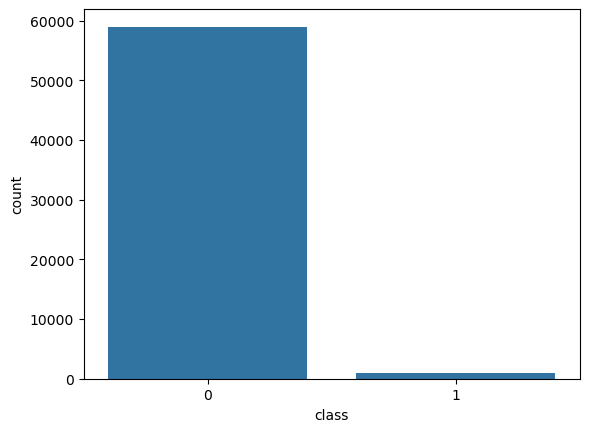

In [75]:
class_counts = df_train['class'].value_counts().reset_index()
class_counts.columns = ['class', 'count']

sns.barplot(data=class_counts, x='class', y='count')

<Axes: xlabel='class', ylabel='count'>

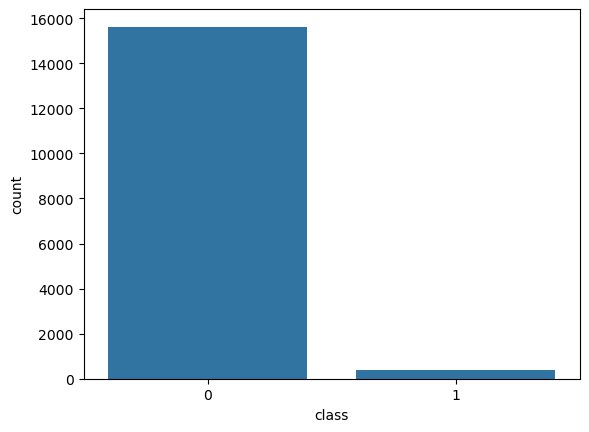

In [76]:
class_counts_test = df_test['class'].value_counts().reset_index()
class_counts_test.columns = ['class', 'count']

sns.barplot(data=class_counts_test, x='class', y='count')

From this, we can see that our dataset is very unbalanced.

We're gonna resolve this later.

# EDA and Preprocessing

Now we're going to analyse the percentage of misssing data in the dataset.

In [77]:
total_num_data = len(df_train.index)
missing_data_count = pd.DataFrame(df_train.isnull().sum().sort_values(ascending=False), columns=['Number'])
missing_data_percent = pd.DataFrame(df_train.isnull().sum().sort_values(ascending=False)/total_num_data, columns=['Percent'])
missing_data = pd.concat([missing_data_count, missing_data_percent], axis=1)
missing_data

,Number,Percent
br_000,49264,0.821067
bq_000,48722,0.812033
bp_000,47740,0.795667
bo_000,46333,0.772217
ab_000,46329,0.772150
...,...,...
cj_000,338,0.005633
ci_000,338,0.005633
bt_000,167,0.002783
aa_000,0,0.000000


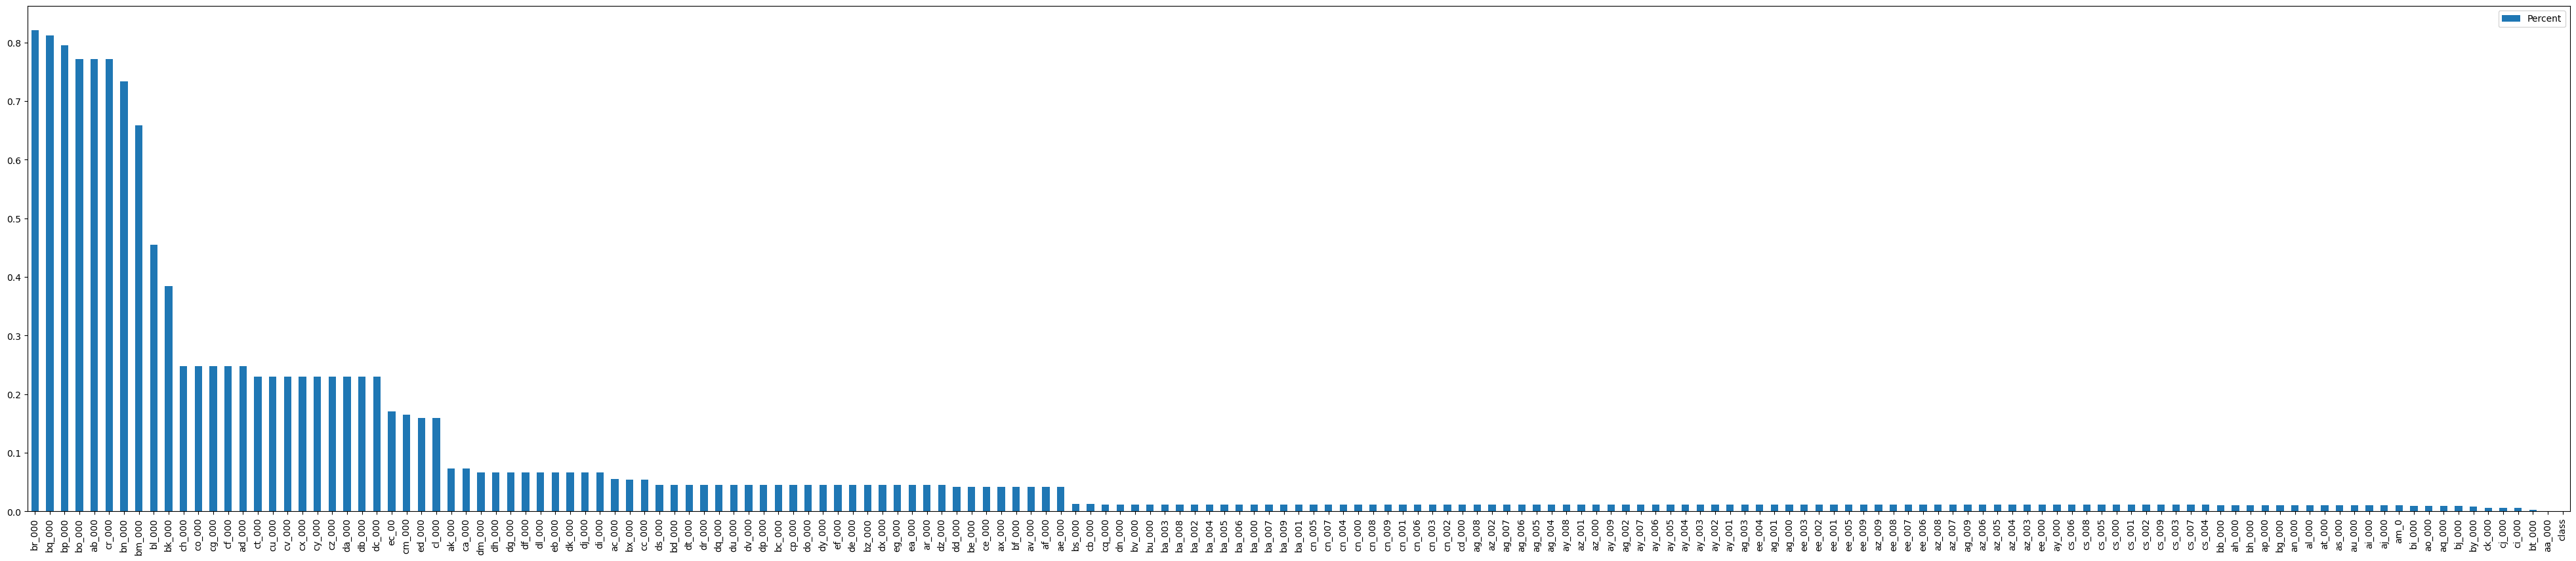

In [78]:
missing_data_percent.plot.bar(figsize=(50,10))
plt.show()

In [79]:
total_num_data_test = len(df_test.index)
missing_data_count_test = pd.DataFrame(df_test.isnull().sum().sort_values(ascending=False), columns=['Number'])
missing_data_percent_test = pd.DataFrame(df_test.isnull().sum().sort_values(ascending=False)/total_num_data_test, columns=['Percent'])
missing_data_test = pd.concat([missing_data_count_test, missing_data_percent_test], axis=1)
missing_data_test

,Number,Percent
br_000,13129,0.820562
bq_000,12981,0.811312
bp_000,12721,0.795063
bo_000,12376,0.773500
ab_000,12363,0.772687
...,...,...
cj_000,86,0.005375
ci_000,86,0.005375
bt_000,28,0.001750
aa_000,0,0.000000


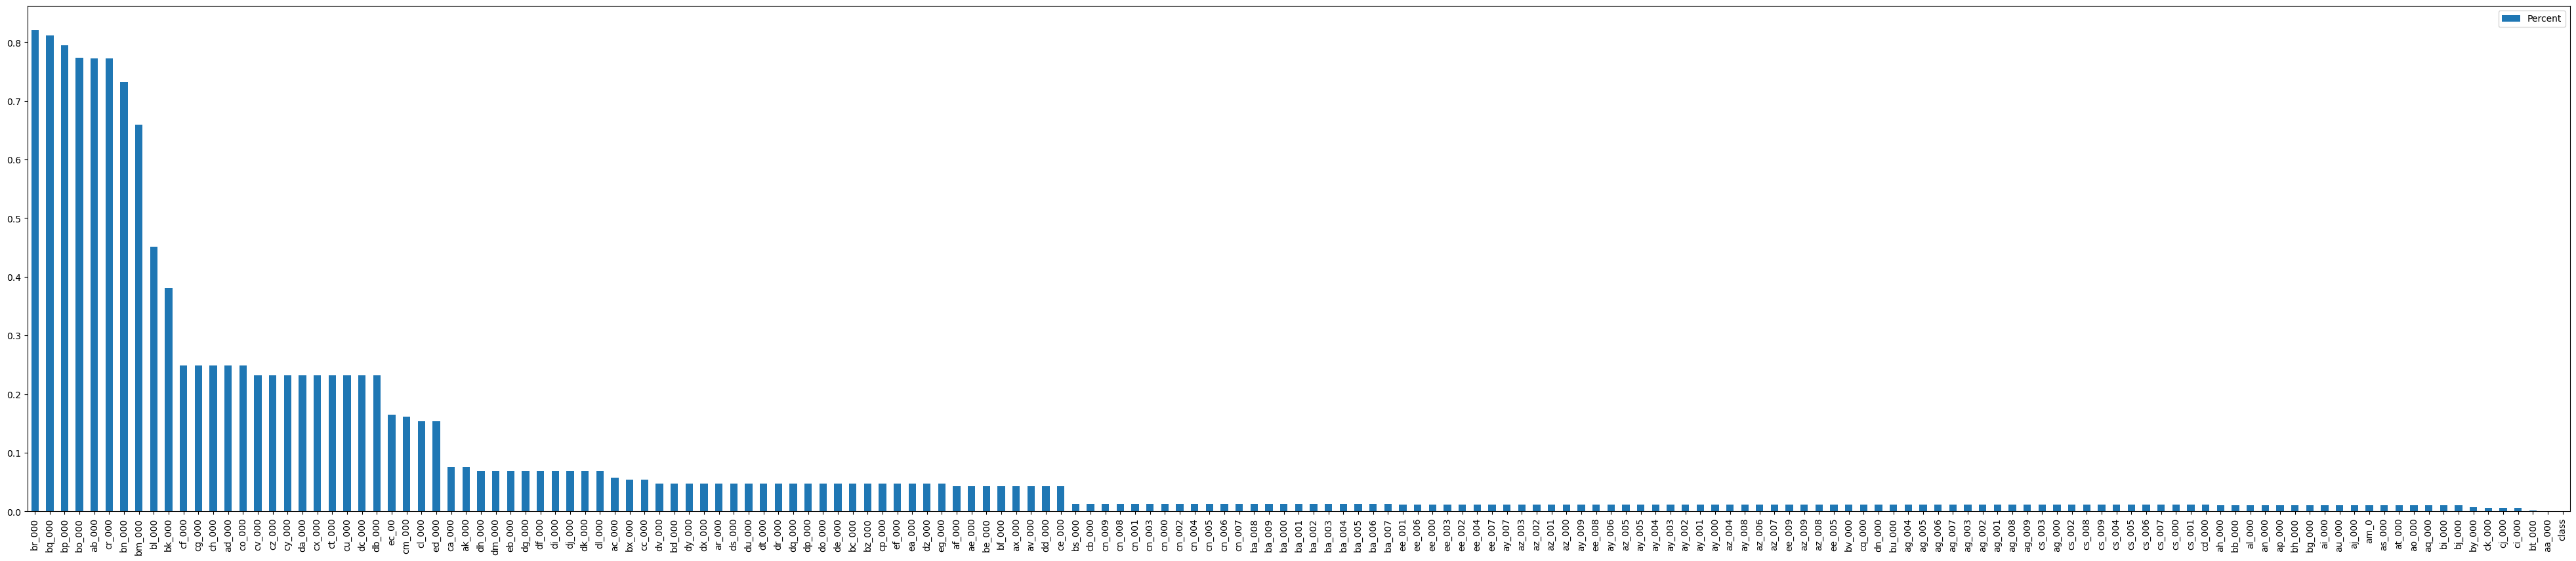

In [80]:
missing_data_percent_test.plot.bar(figsize=(50,10))
plt.show()

For features with more than 30% missing values, we will remove them from the dataset.

For features with missing values between 10% and 30%, we will use the n_nearest_features method to estimate the values.

For features with less than 10% missing values, we will use the median value to fill in the gaps.

In [81]:
missing_column_30_index = missing_data[missing_data['Percent'] >= 0.3].index
print(missing_column_30_index)

Index(['br_000', 'bq_000', 'bp_000', 'bo_000', 'ab_000', 'cr_000', 'bn_000',
       'bm_000', 'bl_000', 'bk_000'],
      dtype='object')


In [82]:
missing_column_30_index_test = missing_data_test[missing_data_test['Percent'] >= 0.3].index
print(missing_column_30_index_test)

Index(['br_000', 'bq_000', 'bp_000', 'bo_000', 'ab_000', 'cr_000', 'bn_000',
       'bm_000', 'bl_000', 'bk_000'],
      dtype='object')


In [83]:
df_train = df_train.drop(columns=missing_column_30_index)
df_test = df_test.drop(columns=missing_column_30_index_test)

In [84]:
print(df_train.shape)
print(df_test.shape)

(60000, 161)
(16000, 161)


In [85]:
missing_column_10_index = missing_data[(missing_data['Percent'] < 0.3) & (missing_data['Percent'] >= 0.1)].index
print(missing_column_10_index)

Index(['ch_000', 'co_000', 'cg_000', 'cf_000', 'ad_000', 'ct_000', 'cu_000',
       'cv_000', 'cx_000', 'cy_000', 'cz_000', 'da_000', 'db_000', 'dc_000',
       'ec_00', 'cm_000', 'ed_000', 'cl_000'],
      dtype='object')


In [86]:
missing_column_10_index_test = missing_data_test[(missing_data_test['Percent'] < 0.3) & (missing_data_test['Percent'] >= 0.1)].index
print(missing_column_10_index_test)

Index(['cf_000', 'cg_000', 'ch_000', 'ad_000', 'co_000', 'cv_000', 'cz_000',
       'cy_000', 'da_000', 'cx_000', 'ct_000', 'cu_000', 'dc_000', 'db_000',
       'ec_00', 'cm_000', 'cl_000', 'ed_000'],
      dtype='object')


In [87]:
imputer_nn = IterativeImputer(n_nearest_features=5,max_iter=5)
df_filled_1 = pd.DataFrame(imputer_nn.fit_transform(df_train[missing_column_10_index]))
df_train[missing_column_10_index] = df_filled_1

In [88]:
imputer_nn_test = IterativeImputer(n_nearest_features=5,max_iter=5)
df_filled_1_test = pd.DataFrame(imputer_nn_test.fit_transform(df_test[missing_column_10_index_test]))
df_test[missing_column_10_index_test] = df_filled_1_test

c:\Users\User\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [89]:
missing_column_index = missing_data[missing_data['Percent'] < 0.1].index
print(missing_column_index)

Index(['ak_000', 'ca_000', 'dm_000', 'dh_000', 'dg_000', 'df_000', 'dl_000',
       'eb_000', 'dk_000', 'dj_000',
       ...
       'ao_000', 'aq_000', 'bj_000', 'by_000', 'ck_000', 'cj_000', 'ci_000',
       'bt_000', 'aa_000', 'class'],
      dtype='object', length=143)


In [90]:
missing_column_index_test = missing_data_test[missing_data_test['Percent'] < 0.1].index
print(missing_column_index_test)

Index(['ca_000', 'ak_000', 'dh_000', 'dm_000', 'eb_000', 'dg_000', 'df_000',
       'di_000', 'dj_000', 'dk_000',
       ...
       'aq_000', 'bi_000', 'bj_000', 'by_000', 'ck_000', 'cj_000', 'ci_000',
       'bt_000', 'aa_000', 'class'],
      dtype='object', length=143)


In [91]:
imputer_median = SimpleImputer(strategy='median')
df_filled_2 = pd.DataFrame(imputer_median.fit_transform(df_train[missing_column_index]))
df_train[missing_column_index] = df_filled_2

In [92]:
imputer_median_test = SimpleImputer(strategy='median')
df_filled_2_test = pd.DataFrame(imputer_median_test.fit_transform(df_test[missing_column_index_test]))
df_test[missing_column_index_test] = df_filled_2_test

In [93]:
[i for i in df_train.columns if df_train[i].isnull().sum() > 0]

[]

In [94]:
[i for i in df_test.columns if df_test[i].isnull().sum() > 0]

[]

Now, we must standardize the dataset.

In [95]:
y_train = df_train.loc[:, 'class']
x_train = df_train.drop('class', axis=1)
y_test = df_test.loc[:, 'class']
x_test = df_test.drop('class', axis=1)

In [96]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
print(x_train_scaled.shape)
x_test_scaled = scaler.transform(x_test)
print(x_test_scaled.shape)

(60000, 160)
(16000, 160)


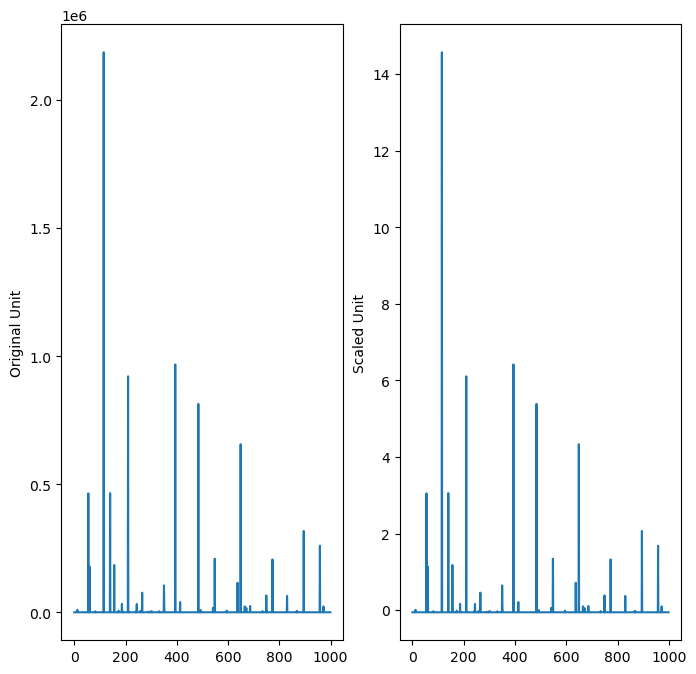

In [97]:
x_train_scaled_head = x_train_scaled[0:1000,7]
x_train_head = x_train.iloc[0:1000,7]

fig = plt.figure(figsize = (8, 8))
fig.add_subplot(1,2,1)
plt.plot(x_train_head,label='train')
plt.ylabel('Original Unit')
fig.add_subplot(1,2,2)
plt.plot(x_train_scaled_head,label='scaled_train')
plt.ylabel('Scaled Unit')
plt.show()

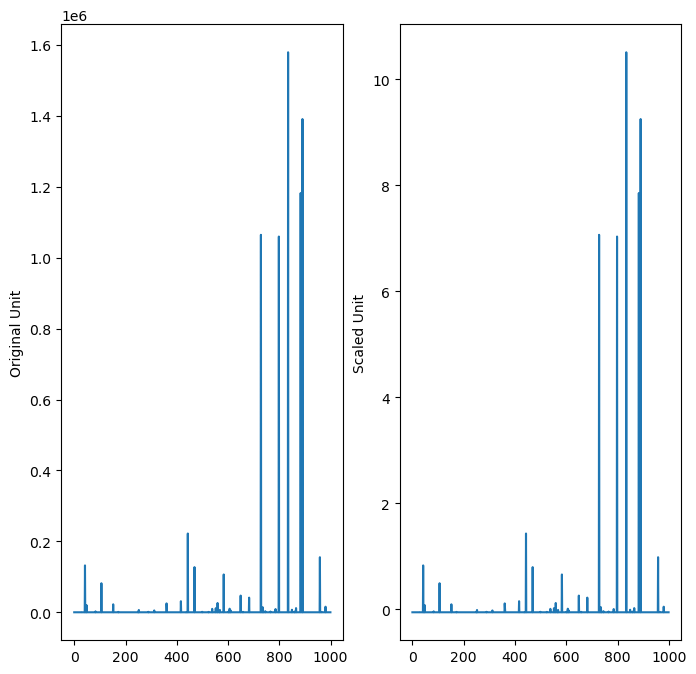

In [98]:
x_test_scaled_head = x_test_scaled[0:1000,7]
x_test_head = x_test.iloc[0:1000,7]

fig = plt.figure(figsize = (8, 8))
fig.add_subplot(1,2,1)
plt.plot(x_test_head,label='train')
plt.ylabel('Original Unit')
fig.add_subplot(1,2,2)
plt.plot(x_test_scaled_head,label='scaled_train')
plt.ylabel('Scaled Unit')
plt.show()

We've observed that our dataset is very unbalanced. To address this, we'll use SMOTE (Synthetic Minority Oversampling Technique). 

Let's set SMOTE to 30% to try to avoid overfitting.

In [99]:
sm = SMOTE(sampling_strategy=0.3)
x_train_new, y_train_new = sm.fit_resample(x_train, y_train)
x_train_scaled_new, y_train_scaled_new = sm.fit_resample(x_train_scaled, y_train)

In [100]:
print(y_train_new.value_counts())

class
0.0    59000
1.0    17700
Name: count, dtype: int64


In [101]:
print(x_train_new.shape)

(76700, 160)


# Dimensionality Reduction - PCA

Since our dataset has 160 features, we're going to use PCA to reduce its dimensionality.

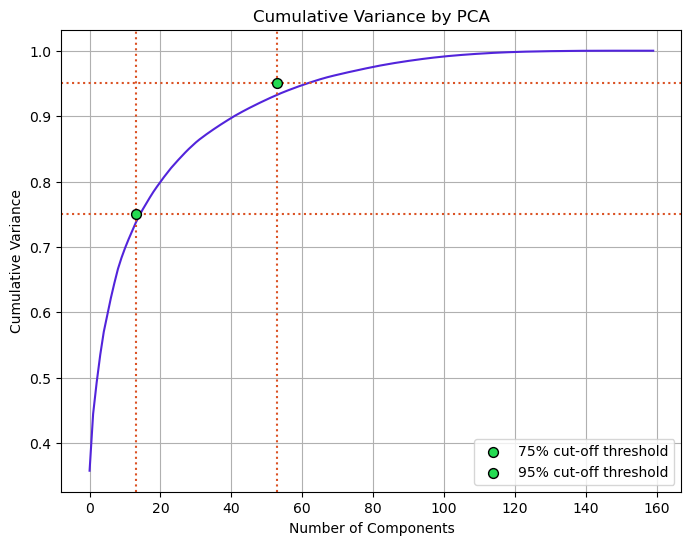

In [102]:
pca = PCA()

pca.fit(x_train_scaled_new)

plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color = '#5224DB')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.title('Cumulative Variance by PCA')
plt.axhline(y=0.75, color='#DB5224', linestyle=':')
plt.axhline(y=0.95, color='#DB5224', linestyle=':')
plt.axvline(x=13, color='#DB5224', linestyle=':')
plt.axvline(x=53, color='#DB5224', linestyle=':')
plt.grid(True)
plt.scatter(13, 0.75, label='75% cut-off threshold', color='#24DB52', s=50, edgecolor='black', zorder = 5)
plt.scatter(53, 0.95, label='95% cut-off threshold', color='#24DB52', s=50, edgecolor='black', zorder =5)
plt.legend()
plt.show()

Based on the graph, we estimate that after reducing the dimensionality of our dataset using PCA, the number of components will be in the range of 13 to 54 features.

In [103]:
n_comp = [0.75, 0.80, 0.85, 0.90, 0.95]

Number of features after PCA =  16


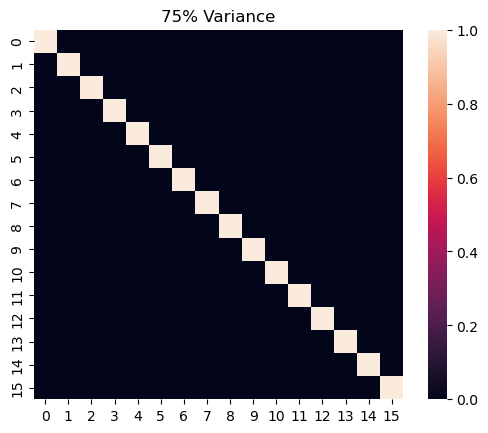

In [104]:
pca = PCA(n_components=n_comp[0])
pca.fit(x_train_scaled_new)
x_train_new_0 = pca.transform(x_train_scaled_new)
x_test_0 = pca.transform(x_test_scaled)
print("Number of features after PCA = ", x_test_0.shape[1])
corrmat_pca = pd.DataFrame(x_train_new_0).corr()
sns.heatmap(corrmat_pca, vmax=1, square=True);
plt.title('75% Variance')
plt.show()
x_train_final_75 = x_train_new_0
y_train_final_75 = y_train_scaled_new
x_test_final_75 = x_test_0
y_test_final_75 = y_test

Number of features after PCA =  22


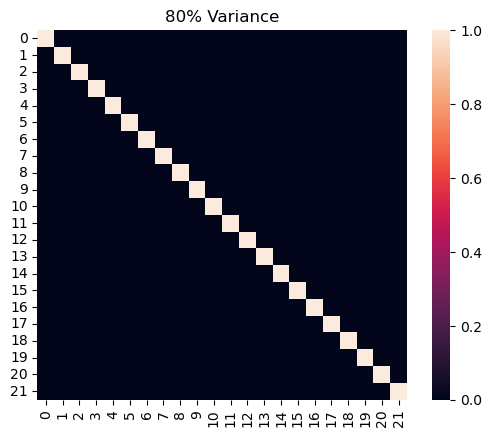

In [105]:
pca = PCA(n_components=n_comp[1])
pca.fit(x_train_scaled_new)
x_train_new_1 = pca.transform(x_train_scaled_new)
x_test_1 = pca.transform(x_test_scaled)
print("Number of features after PCA = ", x_test_1.shape[1])
corrmat_pca = pd.DataFrame(x_train_new_1).corr()
sns.heatmap(corrmat_pca, vmax=1, square=True);
plt.title('80% Variance')
plt.show()
x_train_final_80 = x_train_new_1
y_train_final_80 = y_train_scaled_new
x_test_final_80 = x_test_1
y_test_final_80 = y_test

Number of features after PCA =  30


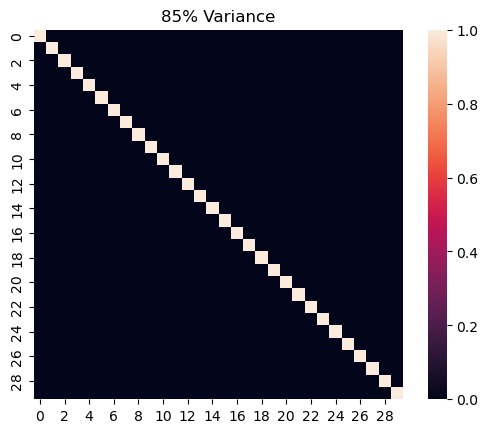

In [106]:
pca = PCA(n_components=n_comp[2])
pca.fit(x_train_scaled_new)
x_train_new_2 = pca.transform(x_train_scaled_new)
x_test_2 = pca.transform(x_test_scaled)
print("Number of features after PCA = ", x_test_2.shape[1])
corrmat_pca = pd.DataFrame(x_train_new_2).corr()
sns.heatmap(corrmat_pca, vmax=1, square=True);
plt.title('85% Variance')
plt.show()
x_train_final_85 = x_train_new_2
y_train_final_85 = y_train_scaled_new
x_test_final_85 = x_test_2
y_test_final_85 = y_test

Number of features after PCA =  42


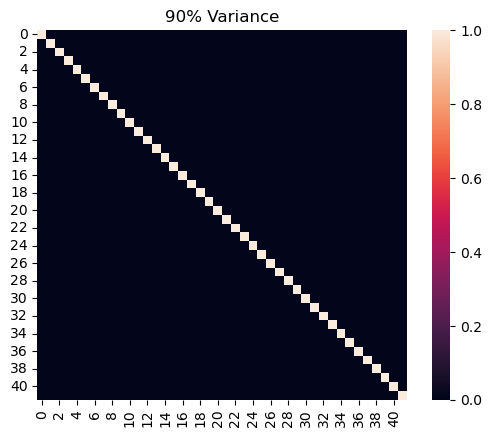

In [107]:
pca = PCA(n_components=n_comp[3])
pca.fit(x_train_scaled_new)
x_train_new_3 = pca.transform(x_train_scaled_new)
x_test_3 = pca.transform(x_test_scaled)
print("Number of features after PCA = ", x_test_3.shape[1])
corrmat_pca = pd.DataFrame(x_train_new_3).corr()
sns.heatmap(corrmat_pca, vmax=1, square=True);
plt.title('90% Variance')
plt.show()
x_train_final_90 = x_train_new_3
y_train_final_90 = y_train_scaled_new
x_test_final_90 = x_test_3
y_test_final_90 = y_test

Number of features after PCA =  63


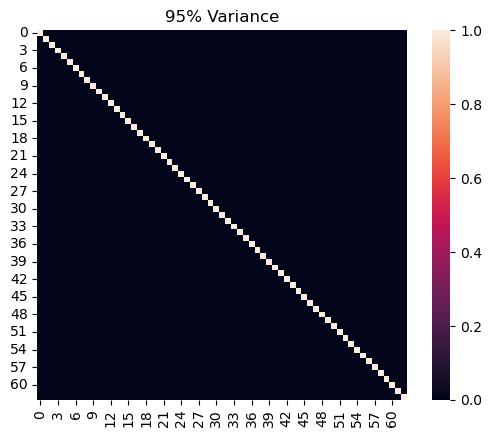

In [108]:
pca = PCA(n_components=n_comp[4])
pca.fit(x_train_scaled_new)
x_train_new_4 = pca.transform(x_train_scaled_new)
x_test_4 = pca.transform(x_test_scaled)
print("Number of features after PCA = ", x_test_4.shape[1])
corrmat_pca = pd.DataFrame(x_train_new_4).corr()
sns.heatmap(corrmat_pca, vmax=1, square=True);
plt.title('95% Variance')
plt.show()
x_train_final_95 = x_train_new_4
y_train_final_95 = y_train_scaled_new
x_test_final_95 = x_test_4
y_test_final_95 = y_test

# Model Training

Now, we need to create a model to reduce maintenance costs.

For this purpose, our model needs to minimize misclassifications based on three given costs:

Cost 1 ($10) - False Positive (FP)

Cost 2 ($25) - True Positive (TP)

Cost 3 ($500) - False Negative (FN)

Therefore, we will use the expected cost as a metric for evaluating our model.

The expected cost is defined as:

$EC = (10 \times FP) + (25 \times TP) + (500 \times FN)$

This metric will help us quantify the total cost associated with different types of prediction errors.

In [174]:
def conf_matrix(y_test, y_predict, model_name='Model'):
    cm = metrics.confusion_matrix(y_test, y_predict)
    
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, cbar=False, fmt='g')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(model_name)
    plt.show()
    
    cm_df = pd.DataFrame(cm, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])
    EC_FP = 10 * cm_df.iloc[0, 1]  # False Positives
    EC_TP = 25 * cm_df.iloc[1, 1]  # True Positives
    EC_FN = 500 * cm_df.iloc[1, 0]  # False Negatives
    total_expected_cost = EC_FP + EC_TP + EC_FN
    
    print("\nConfusion Matrix:")
    print(cm_df)
    
    print("\nCosts:")
    print(f"False Positives Cost (FP): ${EC_FP}")
    print(f"True Positives Cost (TP): ${EC_TP}")
    print(f"False Negatives Cost (FN): ${EC_FN}")
    print(f"Total Expected Cost (EC): ${total_expected_cost}")
    
    return total_expected_cost

In [175]:
def auc_roc(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred) 
    auc_roc = roc_auc_score(y_test, y_pred)

    print(f'AUC-ROC: {auc_roc:.2f}')

    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_roc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()
    return 

# Logistic Regression
Let's start with Logistic Regression.

In [110]:
lg_model = LogisticRegression()

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     15625
         1.0       0.55      0.85      0.67       375

    accuracy                           0.98     16000
   macro avg       0.77      0.92      0.83     16000
weighted avg       0.99      0.98      0.98     16000



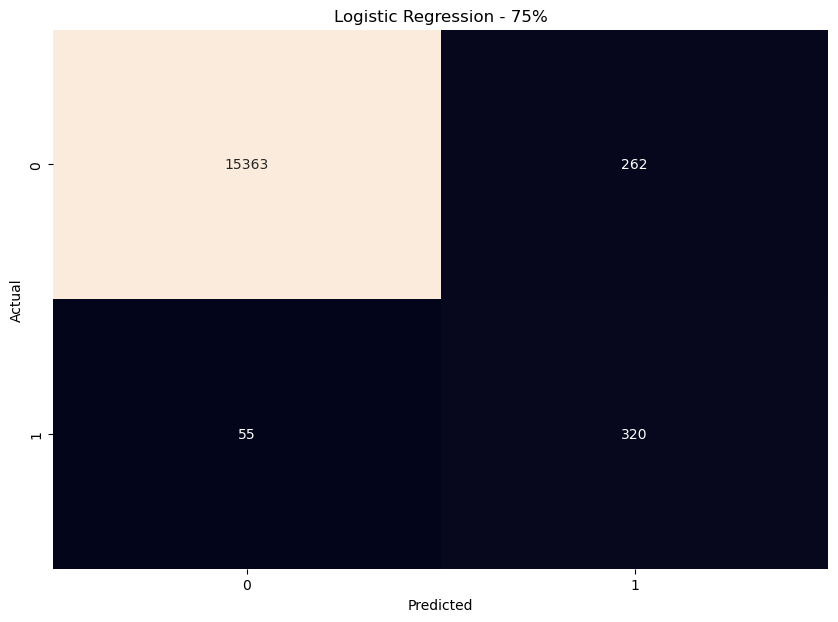


Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative               15363                 262
Actual Positive                  55                 320

Costs:
False Positives Cost (FP): $2620
True Positives Cost (TP): $8000
False Negatives Cost (FN): $27500
Total Expected Cost (EC): $38120
AUC-ROC: 0.92


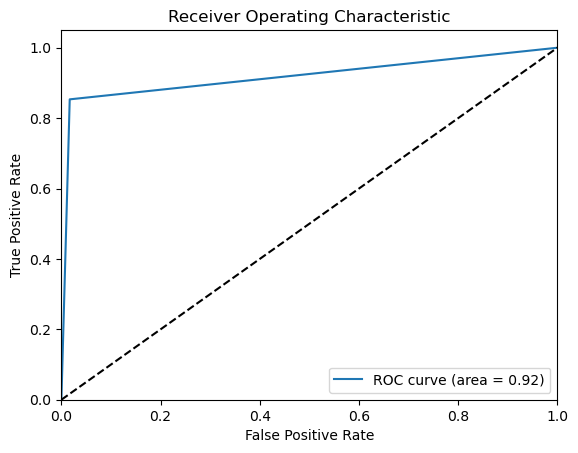

In [176]:
lg_model_75 = lg_model.fit(x_train_final_75, y_train_final_75)
y_pred_lg_75 = lg_model.predict(x_test_final_75)
print(classification_report(y_test_final_75, y_pred_lg_75))
conf_matrix(y_test_final_75, y_pred_lg_75, model_name='Logistic Regression - 75%')
auc_roc(y_test_final_75, y_pred_lg_75)

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     15625
         1.0       0.56      0.85      0.68       375

    accuracy                           0.98     16000
   macro avg       0.78      0.92      0.83     16000
weighted avg       0.99      0.98      0.98     16000



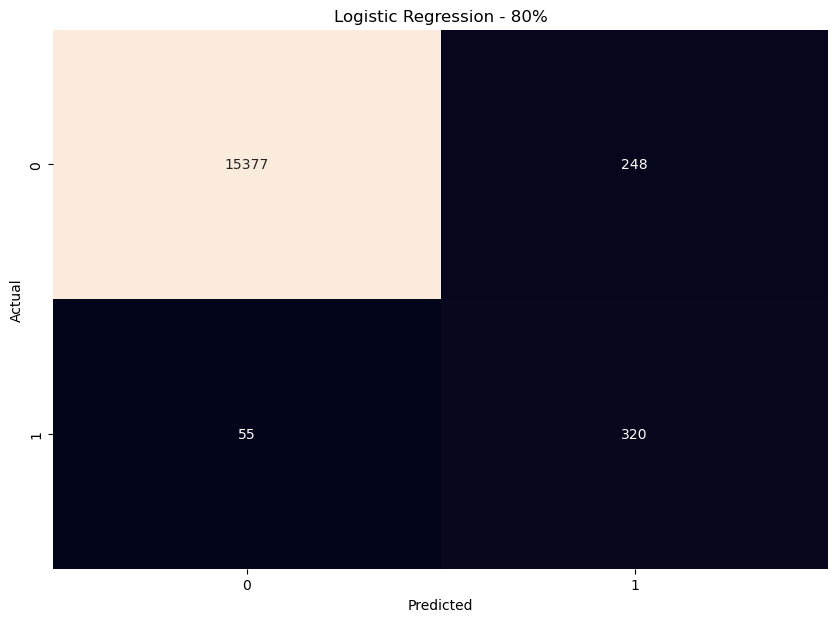


Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative               15377                 248
Actual Positive                  55                 320

Costs:
False Positives Cost (FP): $2480
True Positives Cost (TP): $8000
False Negatives Cost (FN): $27500
Total Expected Cost (EC): $37980
AUC-ROC: 0.92


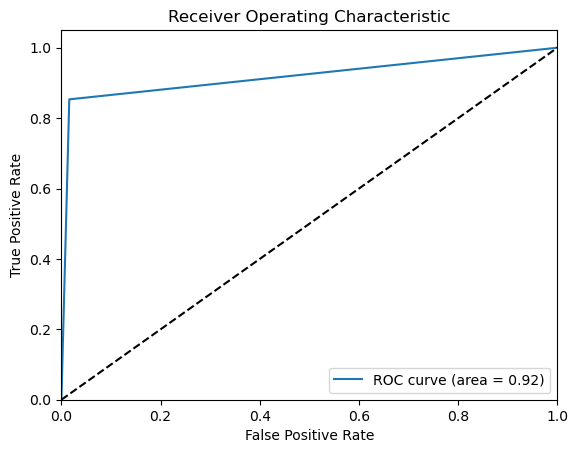

In [180]:
lg_model_80 = lg_model.fit(x_train_final_80, y_train_final_80)
y_pred_lg_80 = lg_model.predict(x_test_final_80)
print(classification_report(y_test_final_80, y_pred_lg_80))
conf_matrix(y_test_final_80, y_pred_lg_80, model_name='Logistic Regression - 80%')
auc_roc(y_test_final_80, y_pred_lg_80)

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     15625
         1.0       0.58      0.87      0.69       375

    accuracy                           0.98     16000
   macro avg       0.79      0.93      0.84     16000
weighted avg       0.99      0.98      0.98     16000



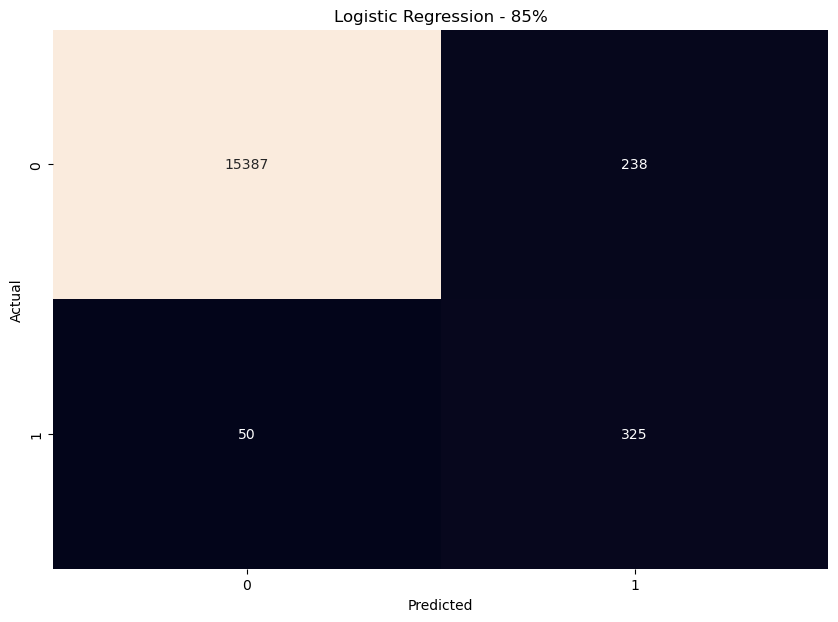


Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative               15387                 238
Actual Positive                  50                 325

Costs:
False Positives Cost (FP): $2380
True Positives Cost (TP): $8125
False Negatives Cost (FN): $25000
Total Expected Cost (EC): $35505
AUC-ROC: 0.93


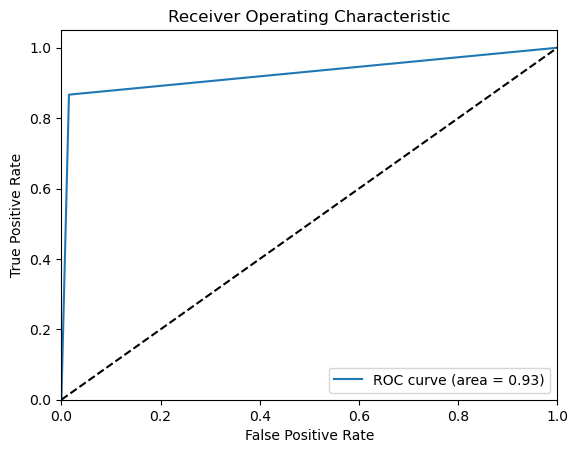

In [181]:
lg_model_85 = lg_model.fit(x_train_final_85, y_train_final_85)
y_pred_lg_85 = lg_model.predict(x_test_final_85)
print(classification_report(y_test_final_85, y_pred_lg_85))
conf_matrix(y_test_final_85, y_pred_lg_85, model_name='Logistic Regression - 85%')
auc_roc(y_test_final_85, y_pred_lg_85)

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     15625
         1.0       0.59      0.86      0.70       375

    accuracy                           0.98     16000
   macro avg       0.79      0.92      0.84     16000
weighted avg       0.99      0.98      0.98     16000



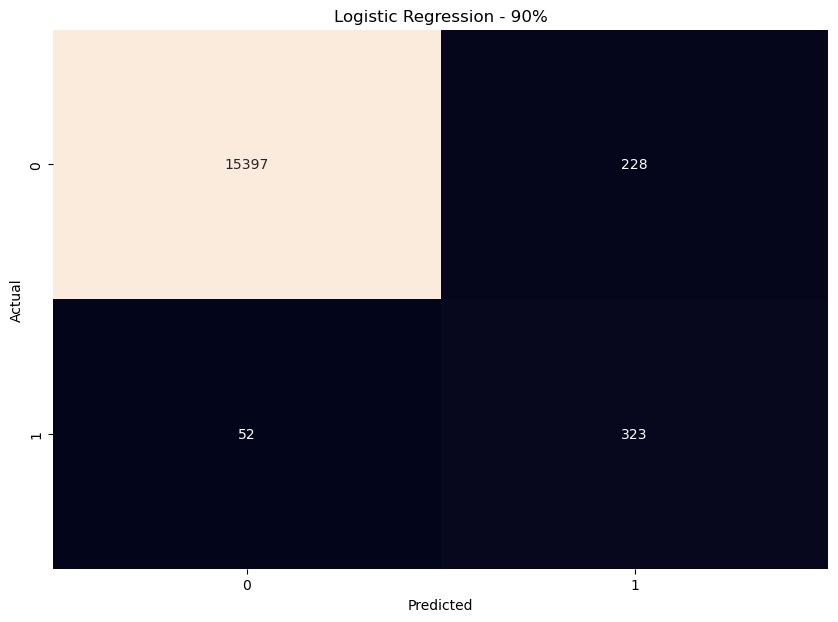


Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative               15397                 228
Actual Positive                  52                 323

Costs:
False Positives Cost (FP): $2280
True Positives Cost (TP): $8075
False Negatives Cost (FN): $26000
Total Expected Cost (EC): $36355
AUC-ROC: 0.92


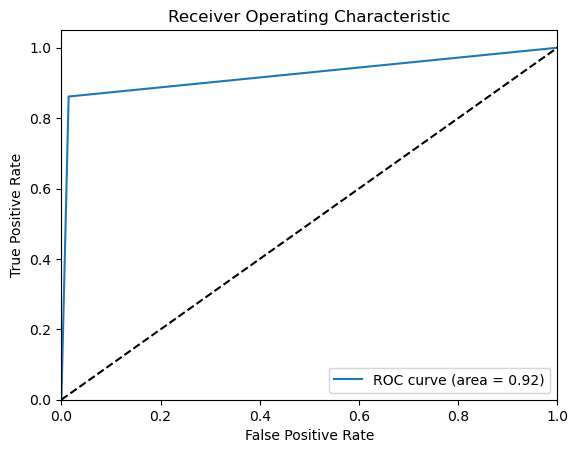

In [182]:
lg_model_90 = lg_model.fit(x_train_final_90, y_train_final_90)
y_pred_lg_90 = lg_model.predict(x_test_final_90)
print(classification_report(y_test_final_90, y_pred_lg_90))
conf_matrix(y_test_final_90, y_pred_lg_90, model_name='Logistic Regression - 90%')
auc_roc(y_test_final_90, y_pred_lg_90)

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     15625
         1.0       0.60      0.87      0.71       375

    accuracy                           0.98     16000
   macro avg       0.80      0.93      0.85     16000
weighted avg       0.99      0.98      0.98     16000



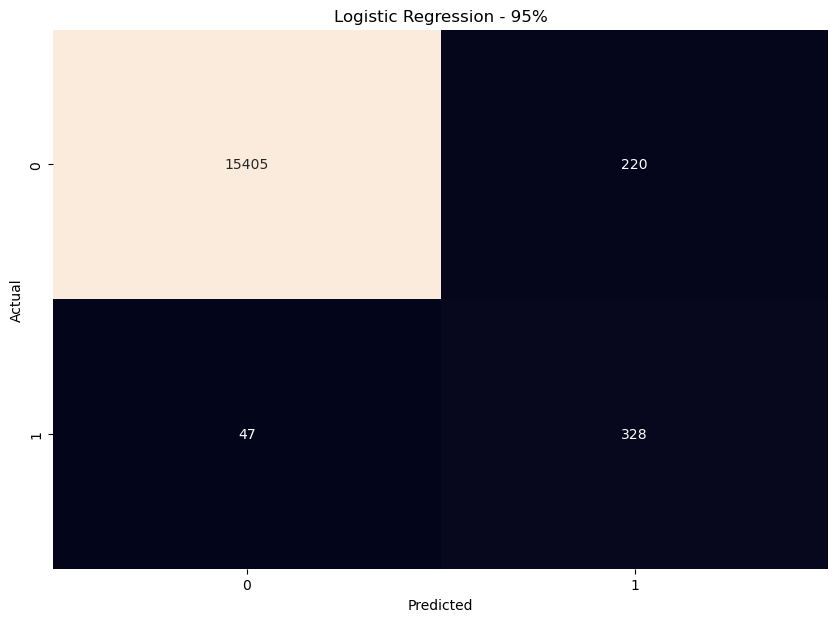


Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative               15405                 220
Actual Positive                  47                 328

Costs:
False Positives Cost (FP): $2200
True Positives Cost (TP): $8200
False Negatives Cost (FN): $23500
Total Expected Cost (EC): $33900
AUC-ROC: 0.93


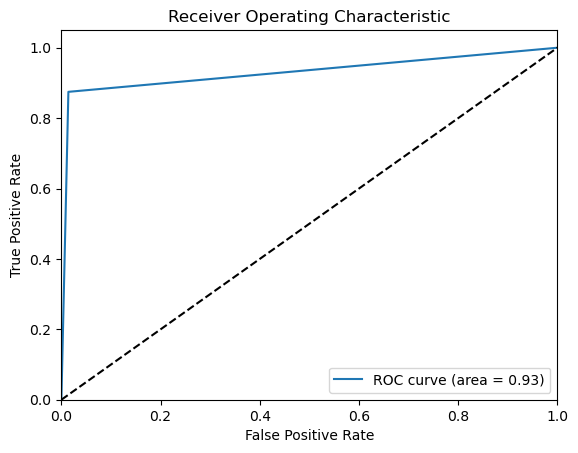

In [183]:
lg_model_95 = lg_model.fit(x_train_final_95, y_train_final_95)
y_pred_lg_95 = lg_model.predict(x_test_final_95)
print(classification_report(y_test_final_95, y_pred_lg_95))
conf_matrix(y_test_final_95, y_pred_lg_95, model_name='Logistic Regression - 95%')
auc_roc(y_test_final_95, y_pred_lg_95)

In [116]:
param_grid_1 = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
param_grid_2 = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l2'],
    'solver': ['liblinear', 'newton-cholesky']
}

In [117]:
def optimize_logistic_regression(x_train, y_train, x_test, y_test, param_grid, scoring, cv):

    logistic = LogisticRegression()

    grid_search = GridSearchCV(estimator=logistic, param_grid=param_grid, cv=5, scoring=scoring, verbose=1)

    grid_search.fit(x_train, y_train)

    print("Best Parameters:")
    print(grid_search.best_params_)

    y_pred = grid_search.best_estimator_.predict(x_test)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    return grid_search

In [118]:
optimize_logistic_regression(x_train_final_75, y_train_final_75, x_test_final_75, y_test_final_75, param_grid_1, scoring='accuracy', cv=5)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters:
{'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     15625
         1.0       0.54      0.87      0.66       375

    accuracy                           0.98     16000
   macro avg       0.77      0.92      0.83     16000
weighted avg       0.99      0.98      0.98     16000



GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy', verbose=1)

In [119]:
optimize_logistic_regression(x_train_final_75, y_train_final_75, x_test_final_75, y_test_final_75, param_grid_2, scoring='accuracy', cv=5)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters:
{'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     15625
         1.0       0.54      0.87      0.66       375

    accuracy                           0.98     16000
   macro avg       0.77      0.92      0.83     16000
weighted avg       0.99      0.98      0.98     16000



GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l2'],
                         'solver': ['liblinear', 'newton-cholesky']},
             scoring='accuracy', verbose=1)

In [120]:
optimize_logistic_regression(x_train_final_80, y_train_final_80, x_test_final_80, y_test_final_80, param_grid_1, scoring='accuracy', cv=5)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters:
{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     15625
         1.0       0.56      0.85      0.68       375

    accuracy                           0.98     16000
   macro avg       0.78      0.92      0.83     16000
weighted avg       0.99      0.98      0.98     16000



GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy', verbose=1)

In [121]:
optimize_logistic_regression(x_train_final_80, y_train_final_80, x_test_final_80, y_test_final_80, param_grid_2, scoring='accuracy', cv=5)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters:
{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     15625
         1.0       0.56      0.85      0.68       375

    accuracy                           0.98     16000
   macro avg       0.78      0.92      0.83     16000
weighted avg       0.99      0.98      0.98     16000



GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l2'],
                         'solver': ['liblinear', 'newton-cholesky']},
             scoring='accuracy', verbose=1)

In [122]:
optimize_logistic_regression(x_train_final_85, y_train_final_85, x_test_final_85, y_test_final_85, param_grid_1, scoring='accuracy', cv=5)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters:
{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     15625
         1.0       0.58      0.87      0.69       375

    accuracy                           0.98     16000
   macro avg       0.79      0.93      0.84     16000
weighted avg       0.99      0.98      0.98     16000



GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy', verbose=1)

In [123]:
optimize_logistic_regression(x_train_final_85, y_train_final_85, x_test_final_85, y_test_final_85, param_grid_2, scoring='accuracy', cv=5)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters:
{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     15625
         1.0       0.58      0.87      0.69       375

    accuracy                           0.98     16000
   macro avg       0.79      0.93      0.84     16000
weighted avg       0.99      0.98      0.98     16000



GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l2'],
                         'solver': ['liblinear', 'newton-cholesky']},
             scoring='accuracy', verbose=1)

In [124]:
optimize_logistic_regression(x_train_final_90, y_train_final_90, x_test_final_90, y_test_final_90, param_grid_1, scoring='accuracy', cv=5)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters:
{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     15625
         1.0       0.59      0.87      0.70       375

    accuracy                           0.98     16000
   macro avg       0.79      0.93      0.85     16000
weighted avg       0.99      0.98      0.98     16000



GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy', verbose=1)

In [125]:
optimize_logistic_regression(x_train_final_90, y_train_final_90, x_test_final_90, y_test_final_90, param_grid_2, scoring='accuracy', cv=5)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters:
{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     15625
         1.0       0.59      0.87      0.70       375

    accuracy                           0.98     16000
   macro avg       0.79      0.93      0.85     16000
weighted avg       0.99      0.98      0.98     16000



GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l2'],
                         'solver': ['liblinear', 'newton-cholesky']},
             scoring='accuracy', verbose=1)

In [126]:
optimize_logistic_regression(x_train_final_95, y_train_final_95, x_test_final_95, y_test_final_95, param_grid_1, scoring='accuracy', cv=5)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


c:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best Parameters:
{'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     15625
         1.0       0.60      0.87      0.71       375

    accuracy                           0.98     16000
   macro avg       0.80      0.93      0.85     16000
weighted avg       0.99      0.98      0.98     16000



GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy', verbose=1)

In [127]:
optimize_logistic_regression(x_train_final_95, y_train_final_95, x_test_final_95, y_test_final_95, param_grid_2, scoring='accuracy', cv=5)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


c:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best Parameters:
{'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     15625
         1.0       0.60      0.87      0.71       375

    accuracy                           0.98     16000
   macro avg       0.80      0.93      0.85     16000
weighted avg       0.99      0.98      0.98     16000



GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l2'],
                         'solver': ['liblinear', 'newton-cholesky']},
             scoring='accuracy', verbose=1)

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     15625
         1.0       0.55      0.85      0.67       375

    accuracy                           0.98     16000
   macro avg       0.77      0.92      0.83     16000
weighted avg       0.99      0.98      0.98     16000



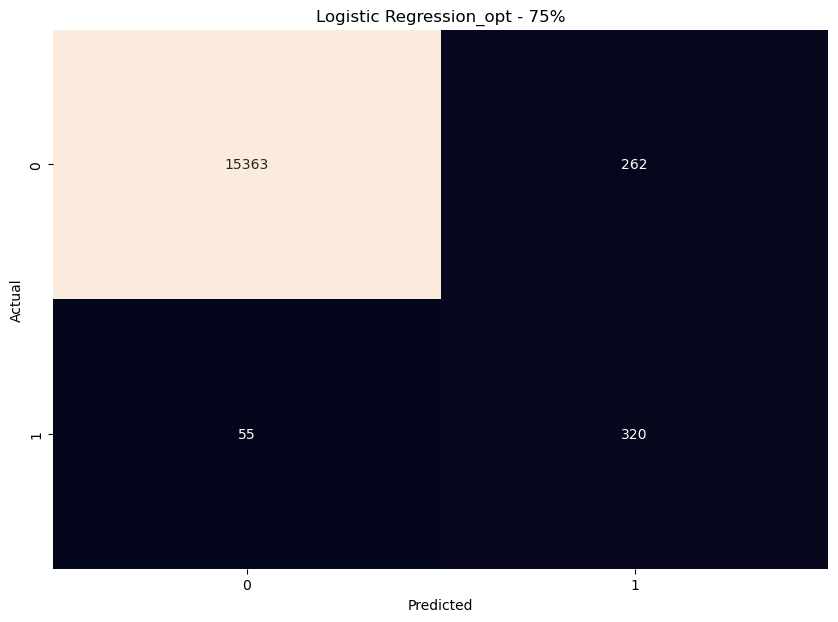


Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative               15363                 262
Actual Positive                  55                 320

Costs:
False Positives Cost (FP): $2620
True Positives Cost (TP): $8000
False Negatives Cost (FN): $27500
Total Expected Cost (EC): $38120
AUC-ROC: 0.92


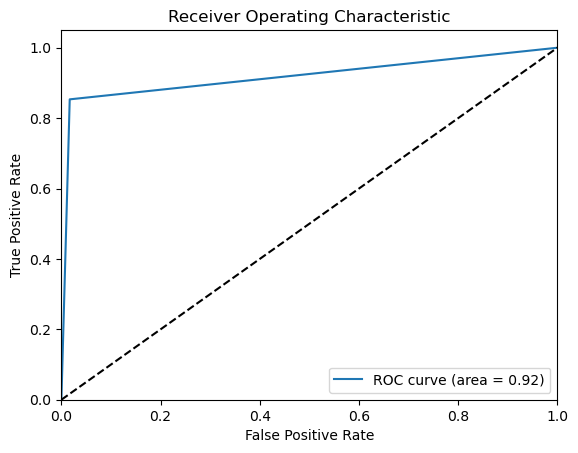

In [184]:
lg_model_opt_75 = LogisticRegression(C= 1, penalty= 'l2', solver='newton-cholesky')
lg_model_75_2 = lg_model_opt_75.fit(x_train_final_75, y_train_final_75)
y_pred_75_2 = lg_model_opt_75.predict(x_test_final_75)
print(classification_report(y_test_final_75, y_pred_75_2))
conf_matrix(y_test_final_75, y_pred_75_2, model_name='Logistic Regression_opt - 75%')
auc_roc(y_test_final_75, y_pred_75_2)

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     15625
         1.0       0.56      0.85      0.68       375

    accuracy                           0.98     16000
   macro avg       0.78      0.92      0.83     16000
weighted avg       0.99      0.98      0.98     16000



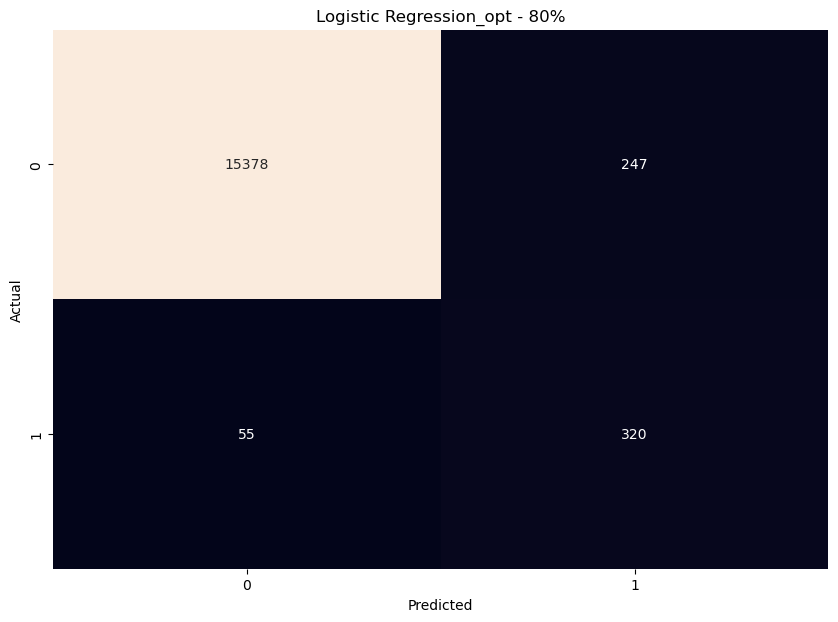


Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative               15378                 247
Actual Positive                  55                 320

Costs:
False Positives Cost (FP): $2470
True Positives Cost (TP): $8000
False Negatives Cost (FN): $27500
Total Expected Cost (EC): $37970
AUC-ROC: 0.92


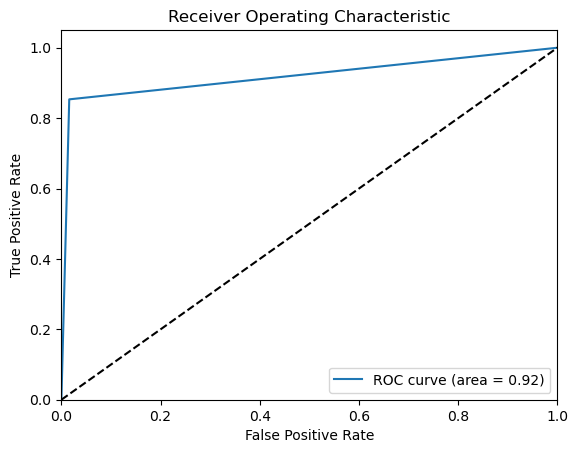

In [185]:
lg_model_opt_80 = LogisticRegression(C= 1, penalty='l2', solver='newton-cholesky')
lg_model_80_2 = lg_model_opt_80.fit(x_train_final_80, y_train_final_80)
y_pred_80_2 = lg_model_opt_80.predict(x_test_final_80)
print(classification_report(y_test_final_80, y_pred_80_2))
conf_matrix(y_test_final_80, y_pred_80_2, model_name='Logistic Regression_opt - 80%')
auc_roc(y_test_final_80, y_pred_80_2)

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     15625
         1.0       0.58      0.87      0.69       375

    accuracy                           0.98     16000
   macro avg       0.79      0.93      0.84     16000
weighted avg       0.99      0.98      0.98     16000



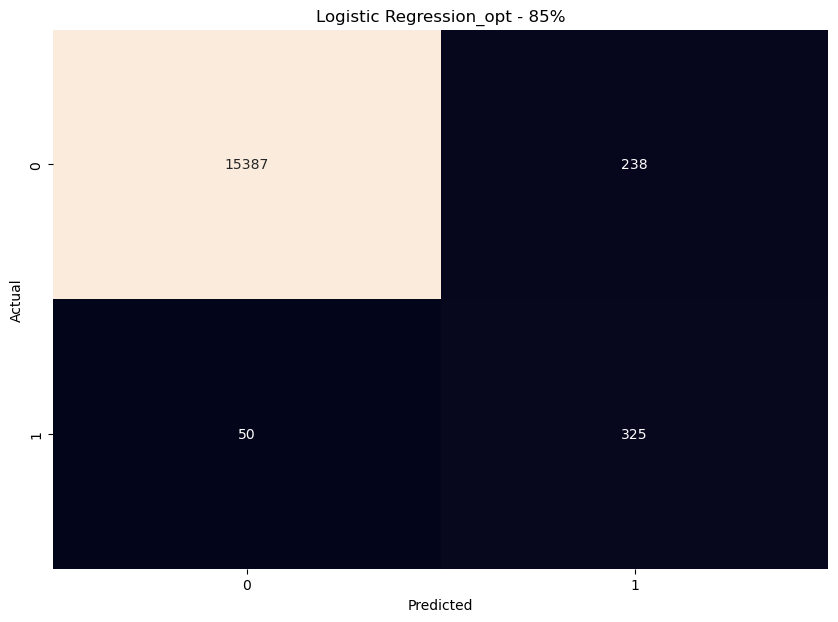


Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative               15387                 238
Actual Positive                  50                 325

Costs:
False Positives Cost (FP): $2380
True Positives Cost (TP): $8125
False Negatives Cost (FN): $25000
Total Expected Cost (EC): $35505
AUC-ROC: 0.93


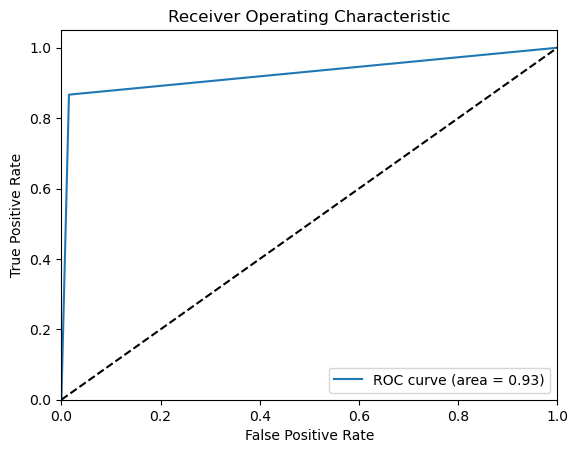

In [186]:
lg_model_opt_85 = LogisticRegression(C=1000, penalty='l2', solver='liblinear')
lg_model_85_2 = lg_model_opt_85.fit(x_train_final_85, y_train_final_85)
y_pred_85_2 = lg_model_opt_85.predict(x_test_final_85)
print(classification_report(y_test_final_85, y_pred_85_2))
conf_matrix(y_test_final_85, y_pred_85_2, model_name='Logistic Regression_opt - 85%')
auc_roc(y_test_final_85, y_pred_85_2)

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     15625
         1.0       0.59      0.86      0.70       375

    accuracy                           0.98     16000
   macro avg       0.79      0.92      0.85     16000
weighted avg       0.99      0.98      0.98     16000



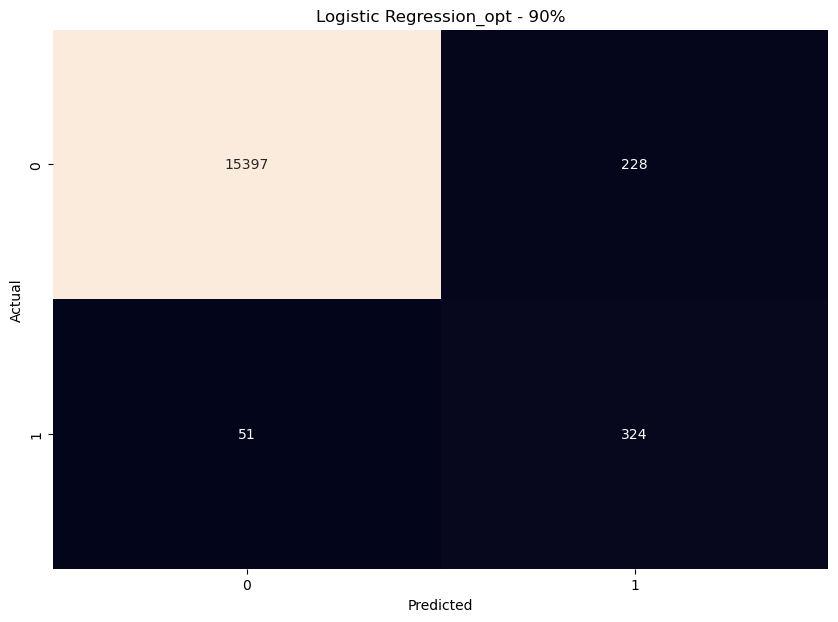


Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative               15397                 228
Actual Positive                  51                 324

Costs:
False Positives Cost (FP): $2280
True Positives Cost (TP): $8100
False Negatives Cost (FN): $25500
Total Expected Cost (EC): $35880
AUC-ROC: 0.92


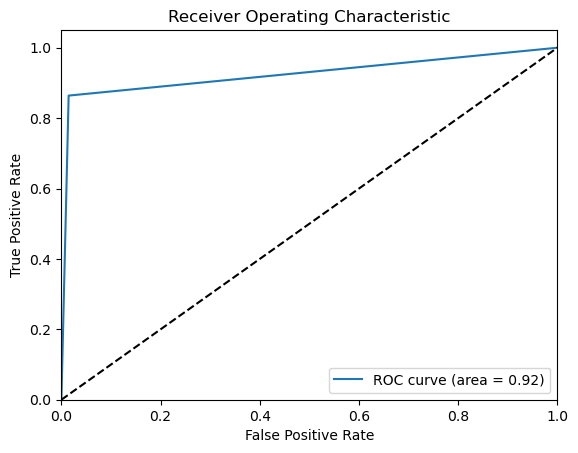

In [187]:
lg_model_opt_90 = LogisticRegression(C=1000, penalty='l2', solver='newton-cholesky')
lg_model_90_2 = lg_model_opt_90.fit(x_train_final_90, y_train_final_90)
y_pred_90_2 = lg_model_opt_90.predict(x_test_final_90)
print(classification_report(y_test_final_90, y_pred_90_2))
conf_matrix(y_test_final_90, y_pred_90_2, model_name='Logistic Regression_opt - 90%')
auc_roc(y_test_final_90, y_pred_90_2)

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     15625
         1.0       0.60      0.87      0.71       375

    accuracy                           0.98     16000
   macro avg       0.80      0.93      0.85     16000
weighted avg       0.99      0.98      0.98     16000



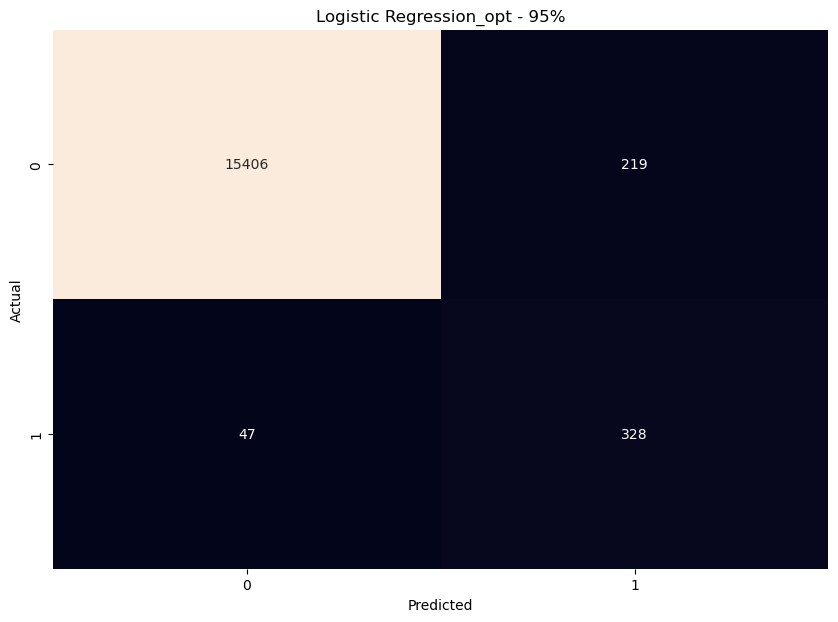


Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative               15406                 219
Actual Positive                  47                 328

Costs:
False Positives Cost (FP): $2190
True Positives Cost (TP): $8200
False Negatives Cost (FN): $23500
Total Expected Cost (EC): $33890
AUC-ROC: 0.93


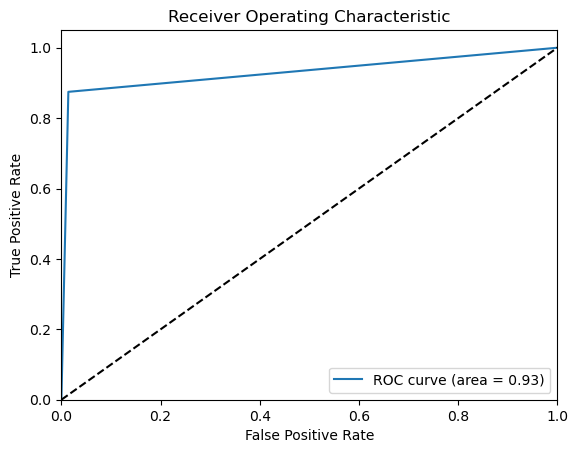

In [188]:
lg_model_opt_95 = LogisticRegression(penalty='l2', solver='liblinear')
lg_model_95_2 = lg_model_opt_95.fit(x_train_final_95, y_train_final_95)
y_pred_95_2 = lg_model_opt_95.predict(x_test_final_95)
print(classification_report(y_test_final_95, y_pred_95_2))
conf_matrix(y_test_final_95, y_pred_95_2, model_name='Logistic Regression_opt - 95%')
auc_roc(y_test_final_95, y_pred_95_2)

Using Logistic Regression Optimized, our best result was from 95% features after PCA that show the total EC = $33890.

# Support Vector Machine

Now we're gonna use SVM.

In [133]:
svm_model = SVC()

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     15625
         1.0       0.58      0.86      0.69       375

    accuracy                           0.98     16000
   macro avg       0.79      0.92      0.84     16000
weighted avg       0.99      0.98      0.98     16000



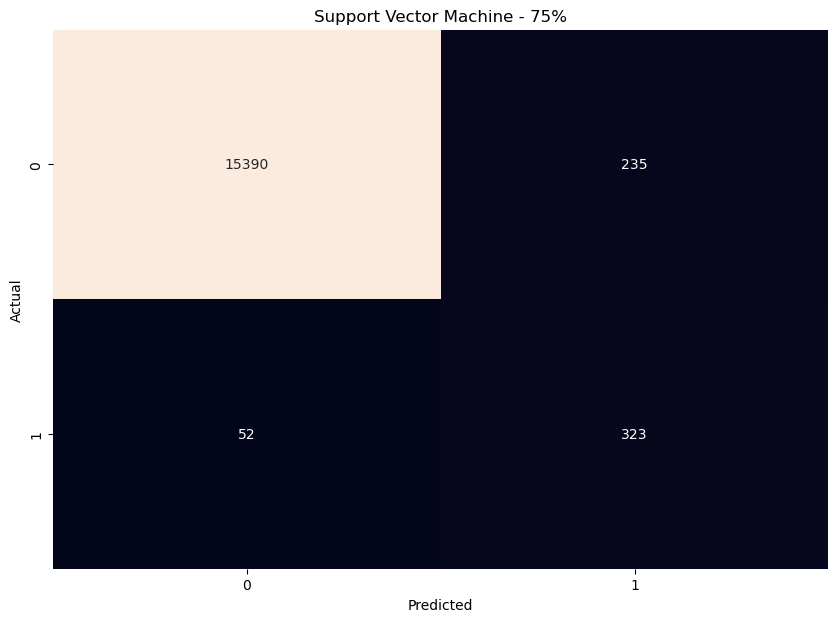


Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative               15390                 235
Actual Positive                  52                 323

Costs:
False Positives Cost (FP): $2350
True Positives Cost (TP): $8075
False Negatives Cost (FN): $26000
Total Expected Cost (EC): $36425
AUC-ROC: 0.92


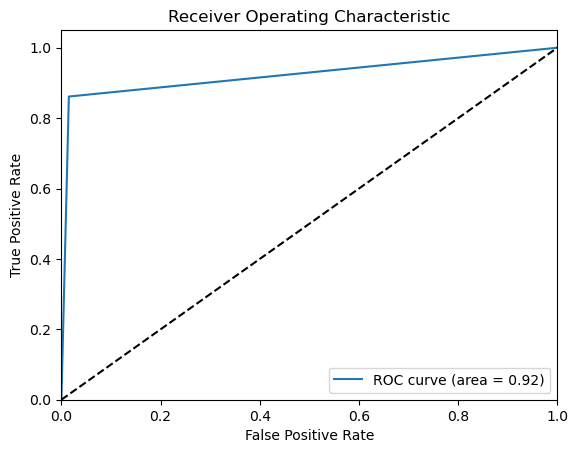

In [189]:
svm_model_75 = svm_model.fit(x_train_final_75, y_train_final_75)
y_pred_svm_75 = svm_model.predict(x_test_final_75)
print(classification_report(y_test_final_75, y_pred_svm_75))
conf_matrix(y_test_final_75, y_pred_svm_75, model_name='Support Vector Machine - 75%')
auc_roc(y_test_final_75, y_pred_svm_75)

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     15625
         1.0       0.60      0.87      0.71       375

    accuracy                           0.98     16000
   macro avg       0.80      0.93      0.85     16000
weighted avg       0.99      0.98      0.98     16000



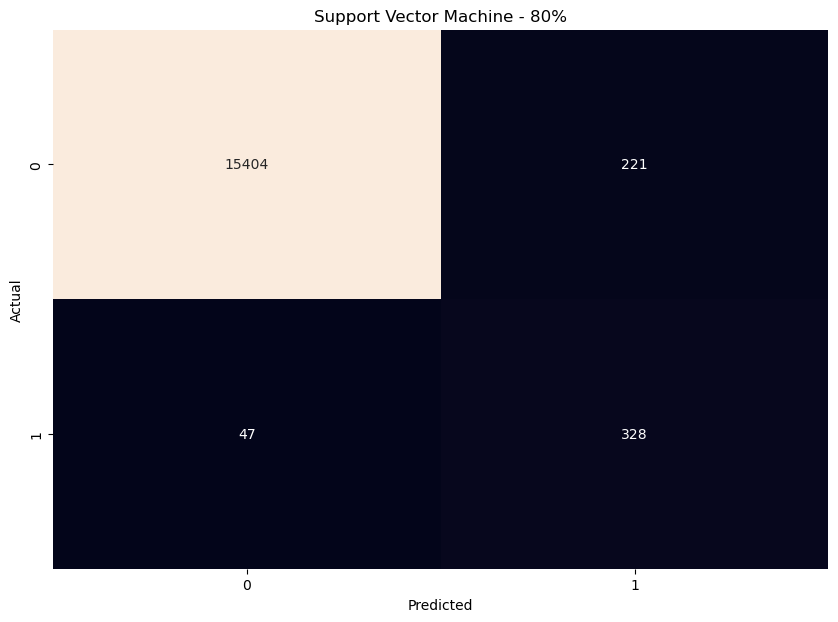


Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative               15404                 221
Actual Positive                  47                 328

Costs:
False Positives Cost (FP): $2210
True Positives Cost (TP): $8200
False Negatives Cost (FN): $23500
Total Expected Cost (EC): $33910
AUC-ROC: 0.93


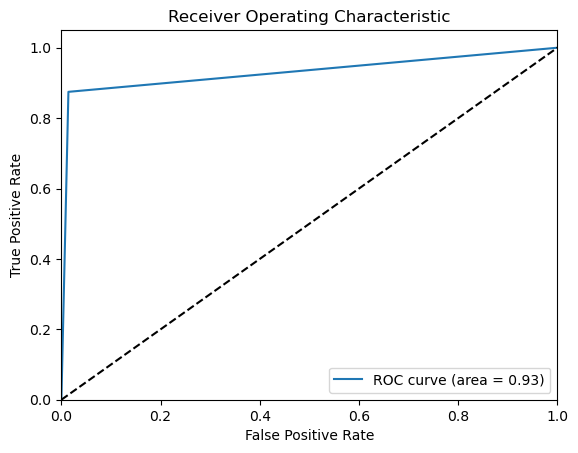

In [190]:
svm_model_80 = svm_model.fit(x_train_final_80, y_train_final_80)
y_pred_svm_80 = svm_model.predict(x_test_final_80)
print(classification_report(y_test_final_80, y_pred_svm_80))
conf_matrix(y_test_final_80, y_pred_svm_80, model_name='Support Vector Machine - 80%')
auc_roc(y_test_final_80, y_pred_svm_80)

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     15625
         1.0       0.63      0.86      0.73       375

    accuracy                           0.98     16000
   macro avg       0.81      0.93      0.86     16000
weighted avg       0.99      0.98      0.99     16000



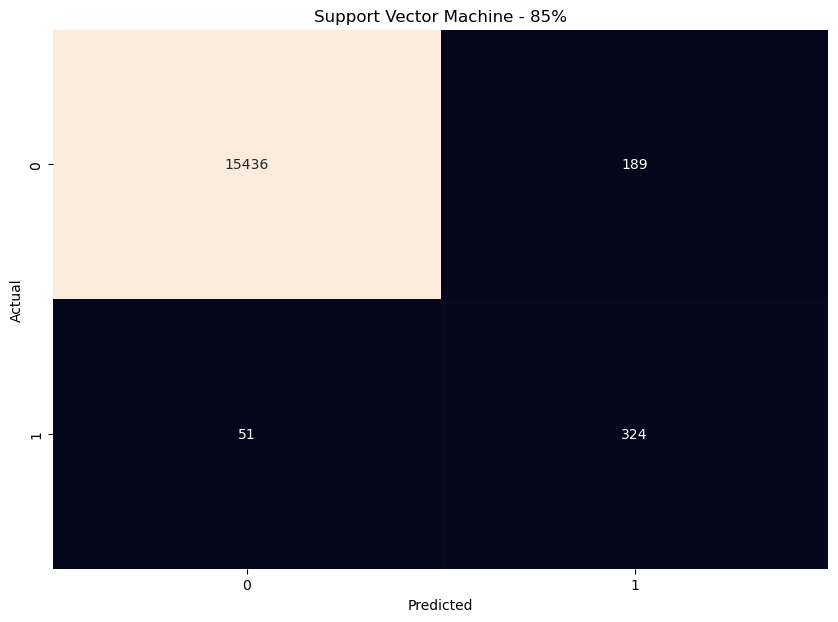


Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative               15436                 189
Actual Positive                  51                 324

Costs:
False Positives Cost (FP): $1890
True Positives Cost (TP): $8100
False Negatives Cost (FN): $25500
Total Expected Cost (EC): $35490
AUC-ROC: 0.93


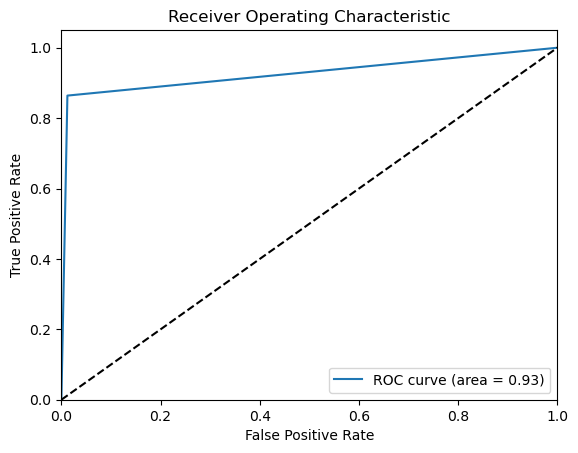

In [191]:
svm_model_85 = svm_model.fit(x_train_final_85, y_train_final_85)
y_pred_svm_85 = svm_model.predict(x_test_final_85)
print(classification_report(y_test_final_85, y_pred_svm_85))
conf_matrix(y_test_final_85, y_pred_svm_85, model_name='Support Vector Machine - 85%')
auc_roc(y_test_final_85, y_pred_svm_85)

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     15625
         1.0       0.64      0.86      0.73       375

    accuracy                           0.99     16000
   macro avg       0.82      0.92      0.86     16000
weighted avg       0.99      0.99      0.99     16000



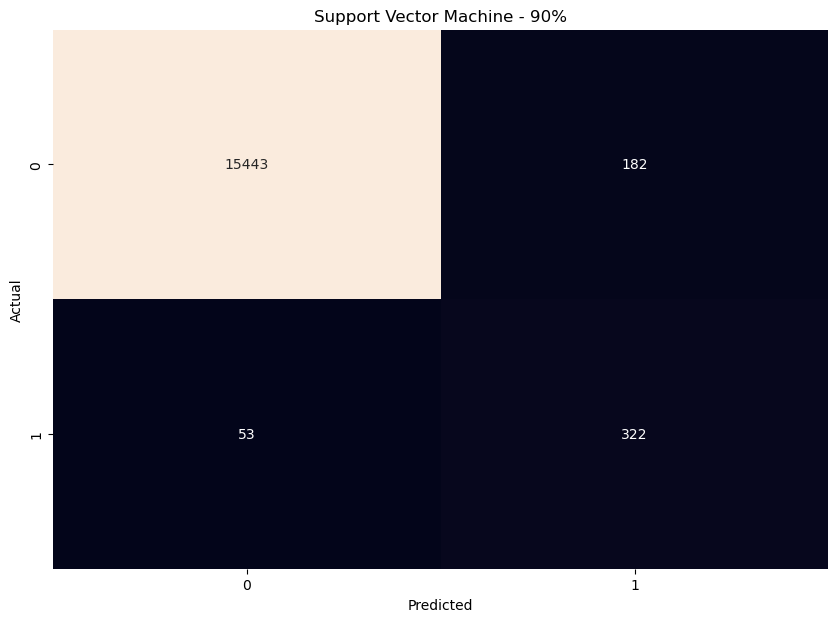


Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative               15443                 182
Actual Positive                  53                 322

Costs:
False Positives Cost (FP): $1820
True Positives Cost (TP): $8050
False Negatives Cost (FN): $26500
Total Expected Cost (EC): $36370
AUC-ROC: 0.92


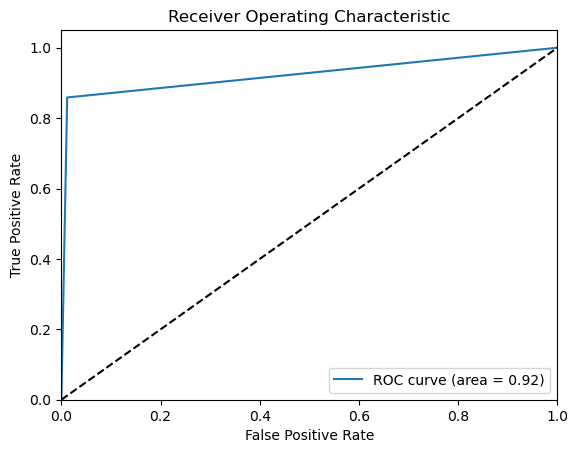

In [192]:
svm_model_90 = svm_model.fit(x_train_final_90, y_train_final_90)
y_pred_svm_90 = svm_model.predict(x_test_final_90)
print(classification_report(y_test_final_90, y_pred_svm_90))
conf_matrix(y_test_final_90, y_pred_svm_90, model_name='Support Vector Machine - 90%')
auc_roc(y_test_final_90, y_pred_svm_90)

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     15625
         1.0       0.67      0.87      0.76       375

    accuracy                           0.99     16000
   macro avg       0.84      0.93      0.88     16000
weighted avg       0.99      0.99      0.99     16000



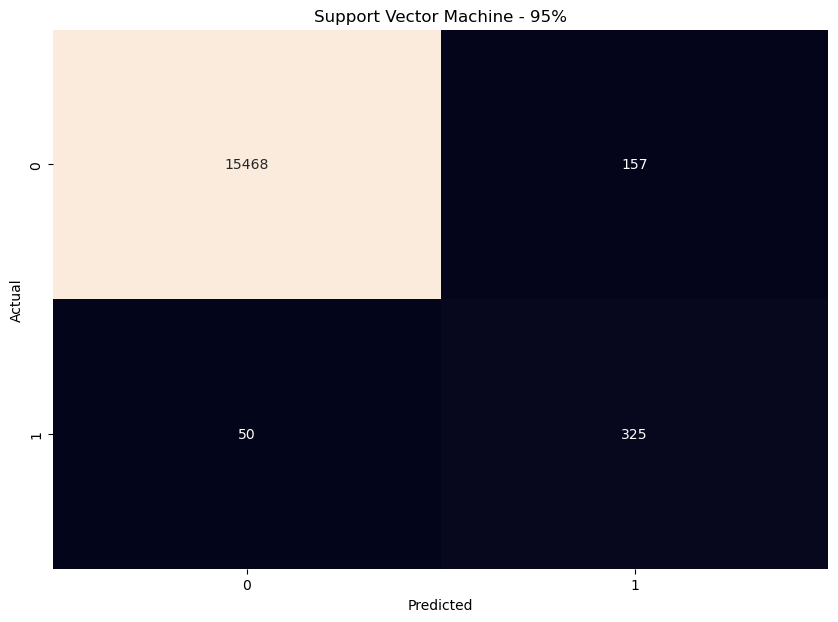


Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative               15468                 157
Actual Positive                  50                 325

Costs:
False Positives Cost (FP): $1570
True Positives Cost (TP): $8125
False Negatives Cost (FN): $25000
Total Expected Cost (EC): $34695
AUC-ROC: 0.93


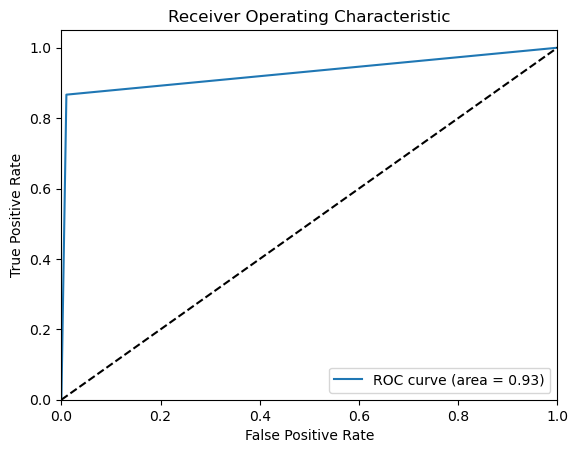

In [193]:
svm_model_95 = svm_model.fit(x_train_final_95, y_train_final_95)
y_pred_svm_95 = svm_model.predict(x_test_final_95)
print(classification_report(y_test_final_95, y_pred_svm_95))
conf_matrix(y_test_final_95, y_pred_svm_95, model_name='Support Vector Machine - 95%')
auc_roc(y_test_final_95, y_pred_svm_95)

In [139]:
param_grid_svm = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

In [140]:
def optimize_svm(x_train, y_train, x_test, y_test, param_grid):

    svm = SVC()

    grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

    grid_search.fit(x_train, y_train)

    print("Best Parameters:")
    print(grid_search.best_params_)

    y_pred = grid_search.best_estimator_.predict(x_test)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    return grid_search

In [141]:
def optimize_bayes_svm(x_train, y_train, x_test, y_test, param_grid):

    svm = SVC()

    bayes_search = BayesSearchCV(estimator=svm, search_spaces=param_grid, n_iter=50, cv=5, scoring='accuracy', verbose=1)

    bayes_search.fit(x_train, y_train)

    print("Best Parameters:")
    print(bayes_search.best_params_)

    y_pred = bayes_search.best_estimator_.predict(x_test)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    return bayes_search

This is one way to optimize the hyperparameters from a svm model, but it takes some time to run.

# KNN

Now we're gonna try to use KNN Classification.

In [142]:
knn_model = KNeighborsClassifier(n_neighbors=50)

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     15625
         1.0       0.48      0.91      0.63       375

    accuracy                           0.97     16000
   macro avg       0.74      0.94      0.81     16000
weighted avg       0.99      0.97      0.98     16000



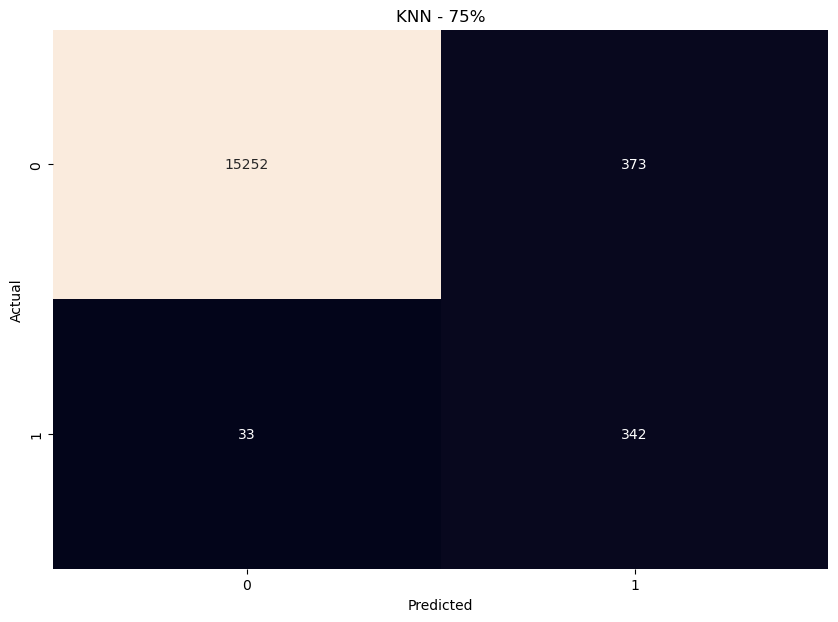


Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative               15252                 373
Actual Positive                  33                 342

Costs:
False Positives Cost (FP): $3730
True Positives Cost (TP): $8550
False Negatives Cost (FN): $16500
Total Expected Cost (EC): $28780
AUC-ROC: 0.94


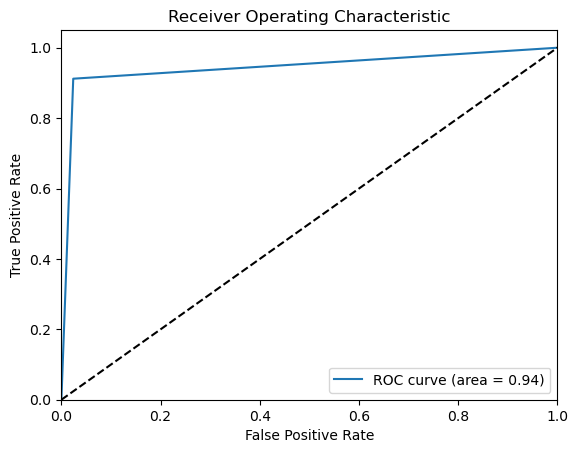

In [194]:
knn_model_75 = knn_model.fit(x_train_final_75, y_train_final_75)
y_pred_knn_75 = knn_model.predict(x_test_final_75)
print(classification_report(y_test_final_75, y_pred_knn_75))
conf_matrix(y_test_final_75, y_pred_knn_75, model_name='KNN - 75%')
auc_roc(y_test_final_75, y_pred_knn_75)

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     15625
         1.0       0.48      0.90      0.62       375

    accuracy                           0.97     16000
   macro avg       0.74      0.94      0.81     16000
weighted avg       0.99      0.97      0.98     16000



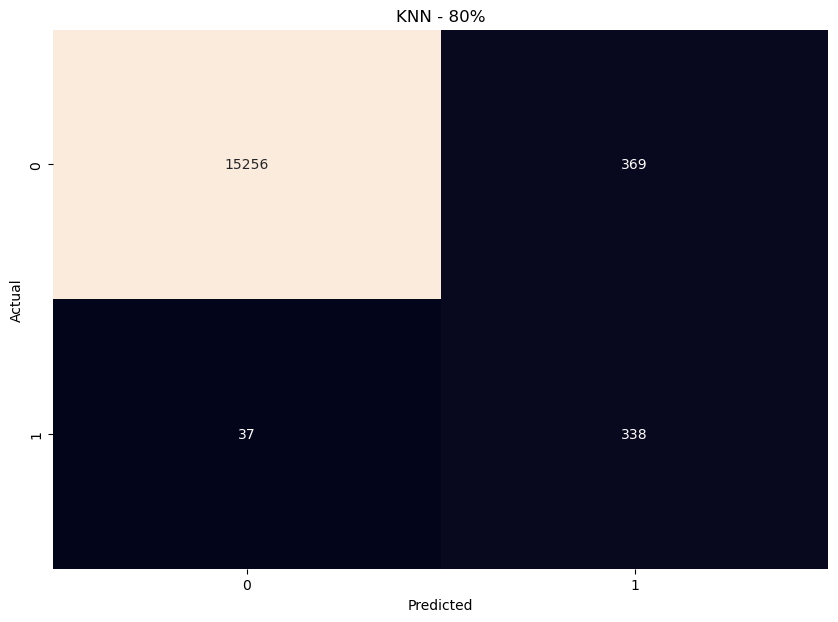


Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative               15256                 369
Actual Positive                  37                 338

Costs:
False Positives Cost (FP): $3690
True Positives Cost (TP): $8450
False Negatives Cost (FN): $18500
Total Expected Cost (EC): $30640
AUC-ROC: 0.94


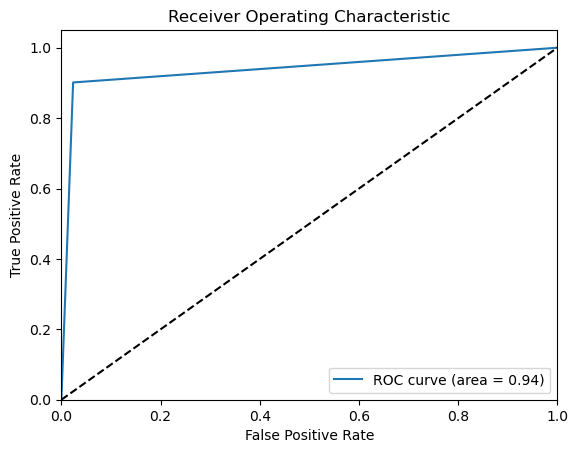

In [195]:
knn_model_80 = knn_model.fit(x_train_final_80, y_train_final_80)
y_pred_knn_80 = knn_model.predict(x_test_final_80)
print(classification_report(y_test_final_80, y_pred_knn_80))
conf_matrix(y_test_final_80, y_pred_knn_80, model_name='KNN - 80%')
auc_roc(y_test_final_80, y_pred_knn_80)

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     15625
         1.0       0.48      0.91      0.63       375

    accuracy                           0.97     16000
   macro avg       0.74      0.94      0.81     16000
weighted avg       0.99      0.97      0.98     16000



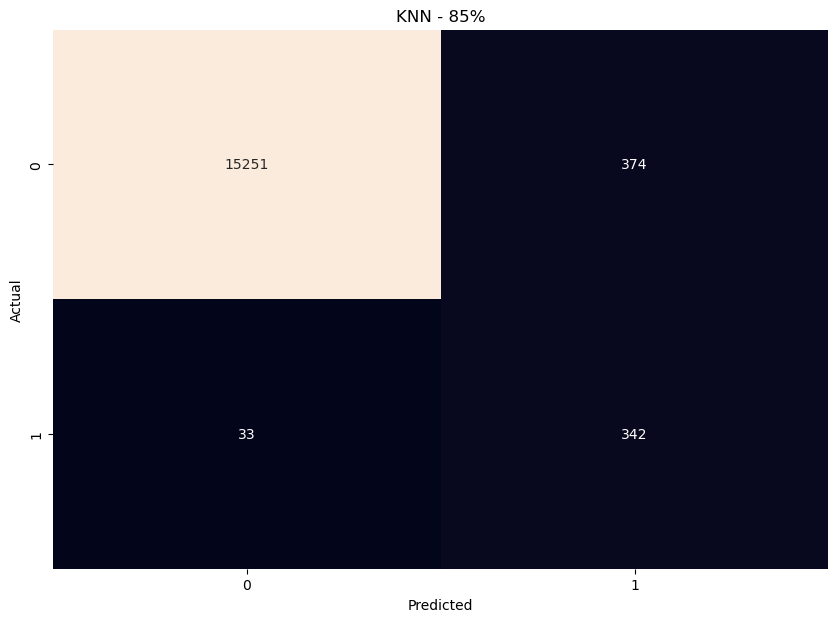


Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative               15251                 374
Actual Positive                  33                 342

Costs:
False Positives Cost (FP): $3740
True Positives Cost (TP): $8550
False Negatives Cost (FN): $16500
Total Expected Cost (EC): $28790
AUC-ROC: 0.94


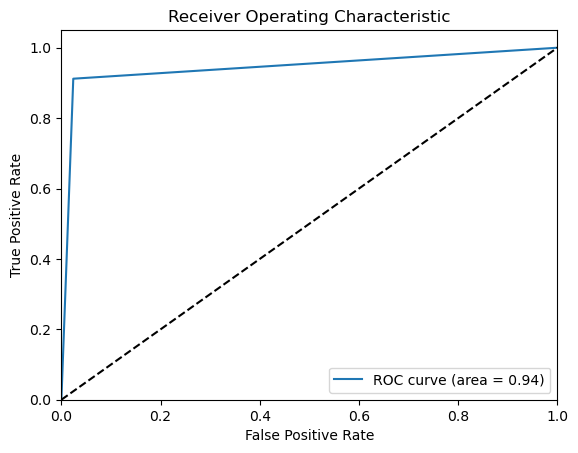

In [196]:
knn_model_85 = knn_model.fit(x_train_final_85, y_train_final_85)
y_pred_knn_85 = knn_model.predict(x_test_final_85)
print(classification_report(y_test_final_85, y_pred_knn_85))
conf_matrix(y_test_final_85, y_pred_knn_85, model_name='KNN - 85%')
auc_roc(y_test_final_85, y_pred_knn_85)

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     15625
         1.0       0.49      0.92      0.64       375

    accuracy                           0.98     16000
   macro avg       0.74      0.95      0.81     16000
weighted avg       0.99      0.98      0.98     16000



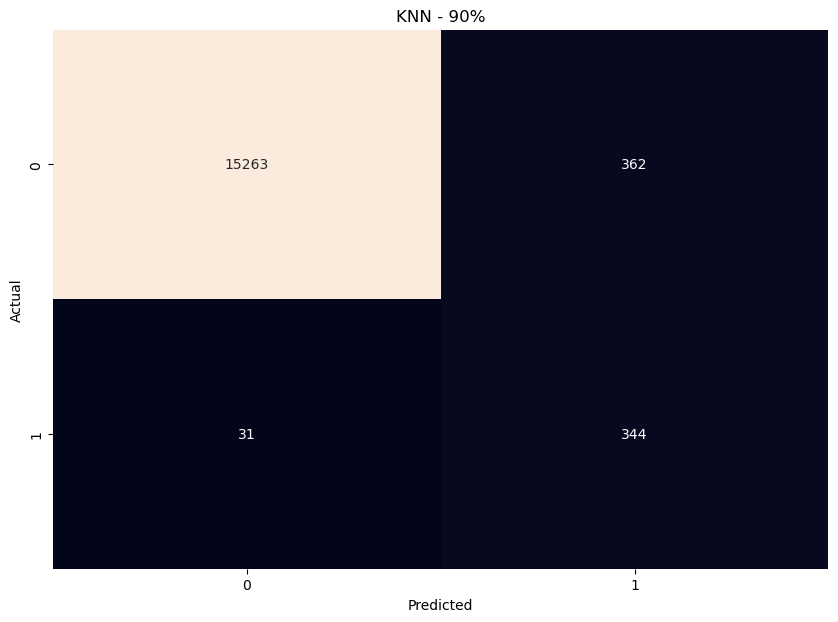


Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative               15263                 362
Actual Positive                  31                 344

Costs:
False Positives Cost (FP): $3620
True Positives Cost (TP): $8600
False Negatives Cost (FN): $15500
Total Expected Cost (EC): $27720
AUC-ROC: 0.95


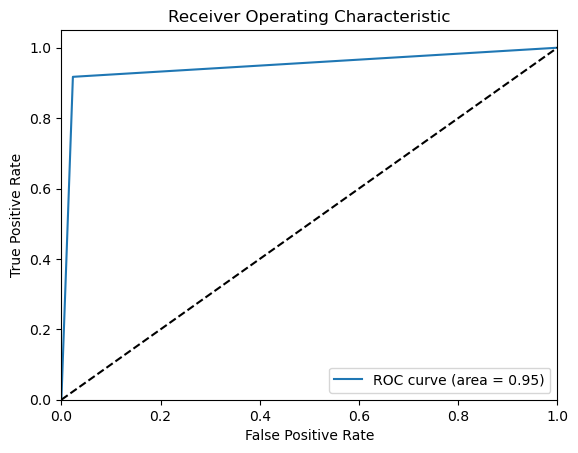

In [197]:
knn_model_90 = knn_model.fit(x_train_final_90, y_train_final_90)
y_pred_knn_90 = knn_model.predict(x_test_final_90)
print(classification_report(y_test_final_90, y_pred_knn_90))
conf_matrix(y_test_final_90, y_pred_knn_90, model_name='KNN - 90%')
auc_roc(y_test_final_90, y_pred_knn_90)

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     15625
         1.0       0.49      0.93      0.64       375

    accuracy                           0.98     16000
   macro avg       0.74      0.95      0.81     16000
weighted avg       0.99      0.98      0.98     16000



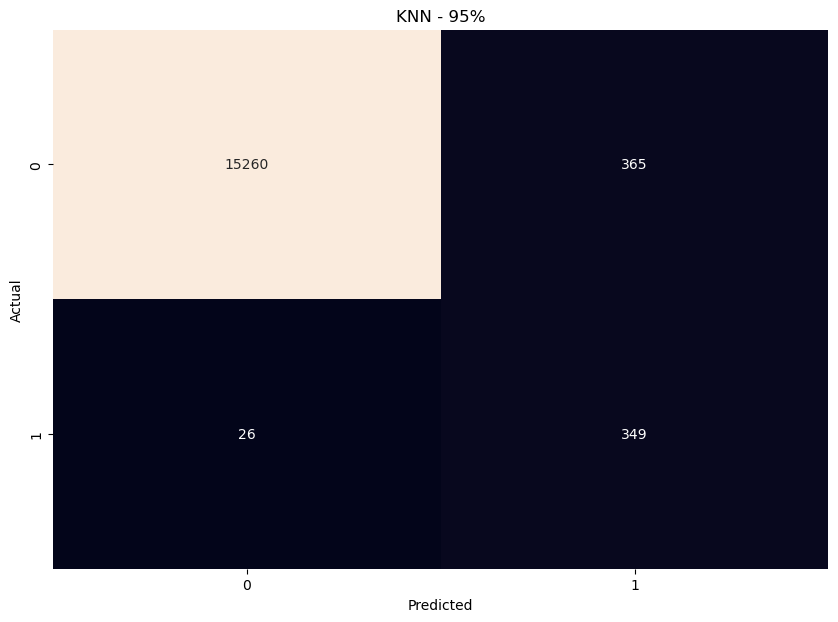


Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative               15260                 365
Actual Positive                  26                 349

Costs:
False Positives Cost (FP): $3650
True Positives Cost (TP): $8725
False Negatives Cost (FN): $13000
Total Expected Cost (EC): $25375
AUC-ROC: 0.95


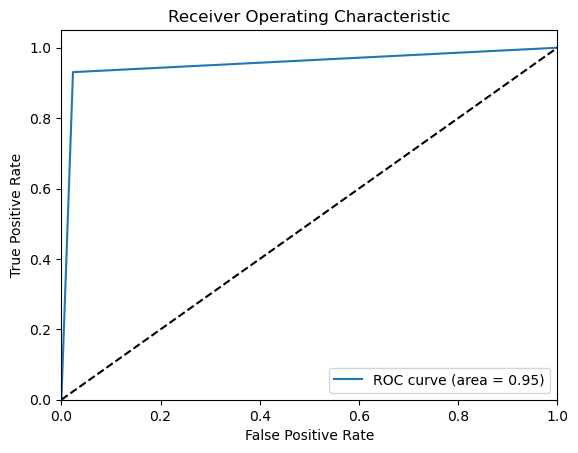

In [198]:
knn_model_95 = knn_model.fit(x_train_final_95, y_train_final_95)
y_pred_knn_95 = knn_model.predict(x_test_final_95)
print(classification_report(y_test_final_95, y_pred_knn_95))
conf_matrix(y_test_final_95, y_pred_knn_95, model_name='KNN - 95%')
auc_roc(y_test_final_95, y_pred_knn_95)

In [150]:
def optimize_knn_hyperparameters_bayes(X_train, y_train, X_test, y_test, init_points=10, n_iter=30, random_state=42):

    def knn_eval(n_neighbors, leaf_size, p):
        params = {
            'n_neighbors': int(n_neighbors),
            'leaf_size': int(leaf_size),
            'p': int(p),
            'algorithm': 'auto'
        }
        
        model = KNeighborsClassifier(**params)
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        
        return accuracy

    pbounds = {
        'n_neighbors': (1, 50),
        'leaf_size': (10, 50),
        'p': (1, 2)
    }

    optimizer = BayesianOptimization(
        f=knn_eval,
        pbounds=pbounds,
        random_state=random_state,
        verbose=2
    )

    optimizer.maximize(init_points=init_points, n_iter=n_iter)

    best_params = optimizer.max['params']
    best_params['n_neighbors'] = int(best_params['n_neighbors'])
    best_params['leaf_size'] = int(best_params['leaf_size'])
    best_params['p'] = int(best_params['p'])

    best_model = KNeighborsClassifier(**best_params)
    best_model.fit(X_train, y_train)

    y_pred = best_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"Melhor acurácia: {accuracy}")
    print(f"Melhores hiperparâmetros: {best_params}")

    return best_model, best_params, accuracy

In [151]:
optimize_knn_hyperparameters_bayes(x_train_final_75, y_train_final_75, x_test_final_75, y_test_final_75)

|   iter    |  target   | leaf_size | n_neig... |     p     |
-------------------------------------------------------------
| 1         | 0.9755    | 24.98     | 47.59     | 1.732     |
| 2         | 0.9519    | 33.95     | 8.645     | 1.156     |
| 3         | 0.9752    | 12.32     | 43.44     | 1.601     |
| 4         | 0.9556    | 38.32     | 2.009     | 1.97      |
| 5         | 0.9497    | 43.3      | 11.4      | 1.182     |
| 6         | 0.9526    | 17.34     | 15.91     | 1.525     |
| 7         | 0.9526    | 27.28     | 15.27     | 1.612     |
| 8         | 0.9526    | 15.58     | 15.32     | 1.366     |
| 9         | 0.9749    | 28.24     | 39.47     | 1.2       |
| 10        | 0.9632    | 30.57     | 30.03     | 1.046     |
| 11        | 0.9759    | 49.09     | 50.0      | 1.0       |
| 12        | 0.9759    | 37.94     | 50.0      | 1.0       |
| 13        | 0.9759    | 10.0      | 50.0      | 1.0       |
| 14        | 0.9744    | 50.0      | 40.86     | 2.0       |
| 15    

(KNeighborsClassifier(leaf_size=49, n_neighbors=50, p=1),
 {'leaf_size': 49, 'n_neighbors': 50, 'p': 1},
 0.9759375)

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98     15625
         1.0       0.31      0.72      0.43       375

    accuracy                           0.96     16000
   macro avg       0.65      0.84      0.70     16000
weighted avg       0.98      0.96      0.96     16000



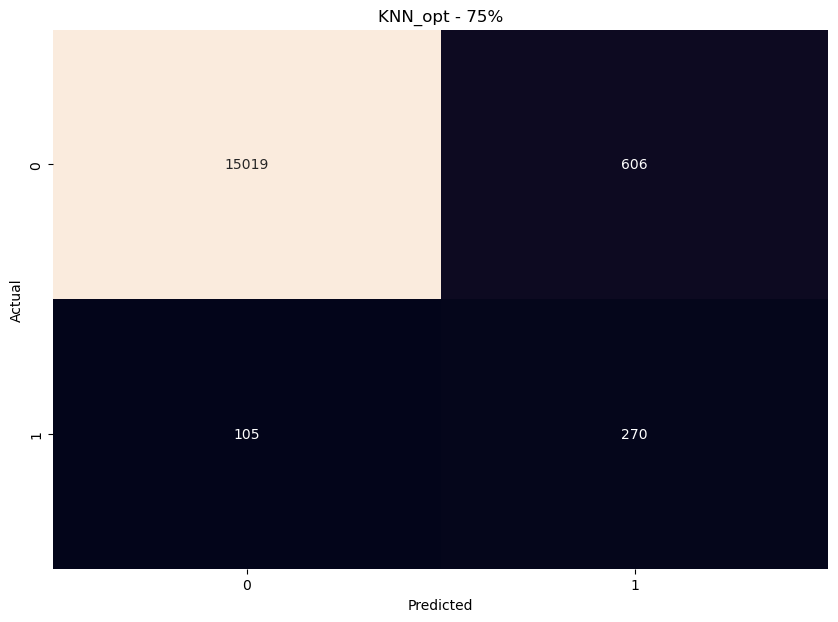


Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative               15019                 606
Actual Positive                 105                 270

Costs:
False Positives Cost (FP): $6060
True Positives Cost (TP): $6750
False Negatives Cost (FN): $52500
Total Expected Cost (EC): $65310
AUC-ROC: 0.84


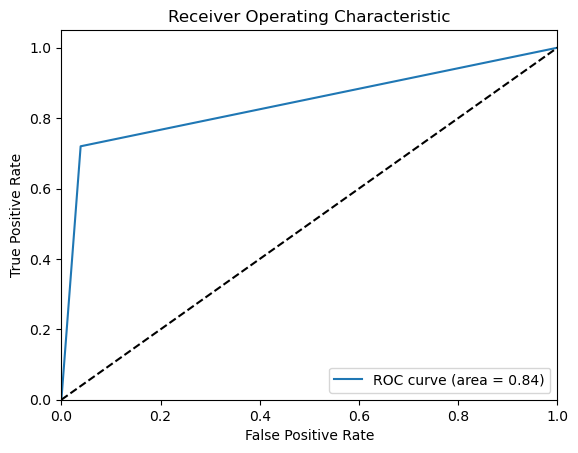

In [199]:
knn_model_opt_75 = KNeighborsClassifier(leaf_size=38, n_neighbors=2, p=1)
knn_model_opt_75.fit(x_train_final_75, y_train_final_75)
y_pred_knn_75_opt = knn_model_opt_75.predict(x_test_final_75)
print(classification_report(y_test_final_75, y_pred_knn_75_opt))
conf_matrix(y_test_final_75, y_pred_knn_75_opt, model_name='KNN_opt - 75%')
auc_roc(y_test_final_75, y_pred_knn_75_opt)

In [153]:
optimize_knn_hyperparameters_bayes(x_train_final_80, y_train_final_80, x_test_final_80, y_test_final_80)

|   iter    |  target   | leaf_size | n_neig... |     p     |
-------------------------------------------------------------
| 1         | 0.9756    | 24.98     | 47.59     | 1.732     |
| 2         | 0.9483    | 33.95     | 8.645     | 1.156     |
| 3         | 0.9758    | 12.32     | 43.44     | 1.601     |
| 4         | 0.9536    | 38.32     | 2.009     | 1.97      |
| 5         | 0.9477    | 43.3      | 11.4      | 1.182     |
| 6         | 0.951     | 17.34     | 15.91     | 1.525     |
| 7         | 0.951     | 27.28     | 15.27     | 1.612     |
| 8         | 0.951     | 15.58     | 15.32     | 1.366     |
| 9         | 0.9758    | 28.24     | 39.47     | 1.2       |
| 10        | 0.9685    | 30.57     | 30.03     | 1.046     |
| 11        | 0.9746    | 50.0      | 50.0      | 2.0       |
| 12        | 0.9761    | 38.23     | 50.0      | 1.0       |
| 13        | 0.9761    | 10.0      | 50.0      | 1.0       |
| 14        | 0.9749    | 43.52     | 40.4      | 2.0       |
| 15    

(KNeighborsClassifier(leaf_size=40, n_neighbors=44, p=1),
 {'leaf_size': 40, 'n_neighbors': 44, 'p': 1},
 0.9763125)

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98     15625
         1.0       0.30      0.73      0.42       375

    accuracy                           0.95     16000
   macro avg       0.65      0.84      0.70     16000
weighted avg       0.98      0.95      0.96     16000



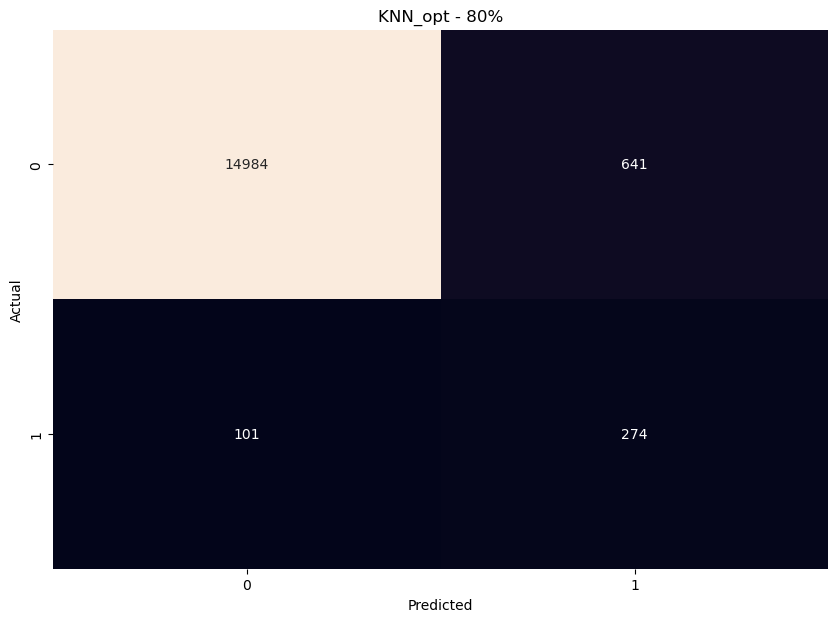


Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative               14984                 641
Actual Positive                 101                 274

Costs:
False Positives Cost (FP): $6410
True Positives Cost (TP): $6850
False Negatives Cost (FN): $50500
Total Expected Cost (EC): $63760
AUC-ROC: 0.84


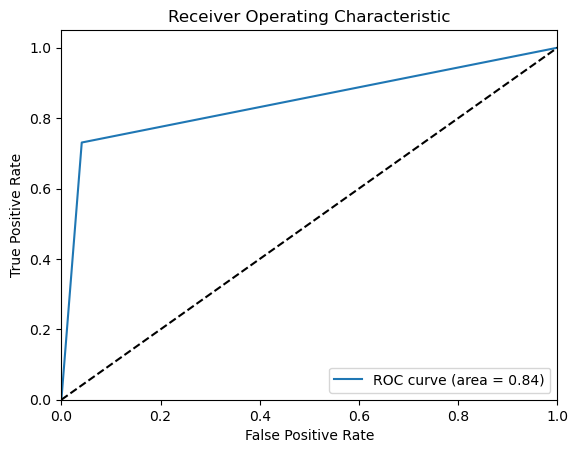

In [200]:
knn_model_opt_80 = KNeighborsClassifier(leaf_size=38, n_neighbors=2, p=1)
knn_model_opt_80.fit(x_train_final_80, y_train_final_80)
y_pred_knn_80_opt = knn_model_opt_80.predict(x_test_final_80)
print(classification_report(y_test_final_80, y_pred_knn_80_opt))
conf_matrix(y_test_final_80, y_pred_knn_80_opt, model_name='KNN_opt - 80%')
auc_roc(y_test_final_80, y_pred_knn_80_opt)

# Ranom Forest

In [155]:
rf_model = RandomForestClassifier()

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     15625
         1.0       0.50      0.85      0.63       375

    accuracy                           0.98     16000
   macro avg       0.75      0.92      0.81     16000
weighted avg       0.98      0.98      0.98     16000



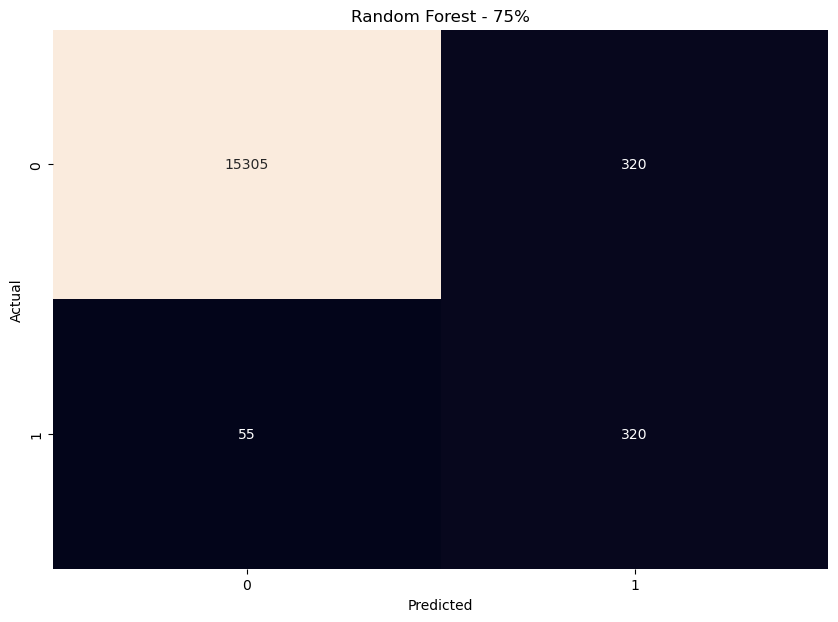


Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative               15305                 320
Actual Positive                  55                 320

Costs:
False Positives Cost (FP): $3200
True Positives Cost (TP): $8000
False Negatives Cost (FN): $27500
Total Expected Cost (EC): $38700
AUC-ROC: 0.92


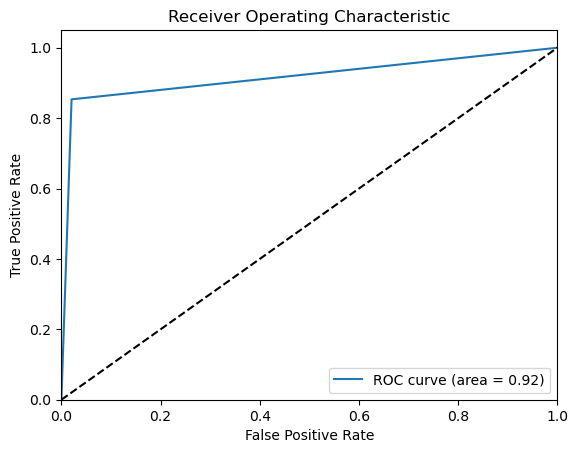

In [201]:
rf_model_75 = rf_model.fit(x_train_final_75, y_train_final_75)
y_pred_rf_75 = rf_model.predict(x_test_final_75)
print(classification_report(y_test_final_75, y_pred_rf_75))
conf_matrix(y_test_final_75, y_pred_rf_75, model_name='Random Forest - 75%')
auc_roc(y_test_final_75, y_pred_rf_75)

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     15625
         1.0       0.55      0.87      0.68       375

    accuracy                           0.98     16000
   macro avg       0.77      0.93      0.83     16000
weighted avg       0.99      0.98      0.98     16000



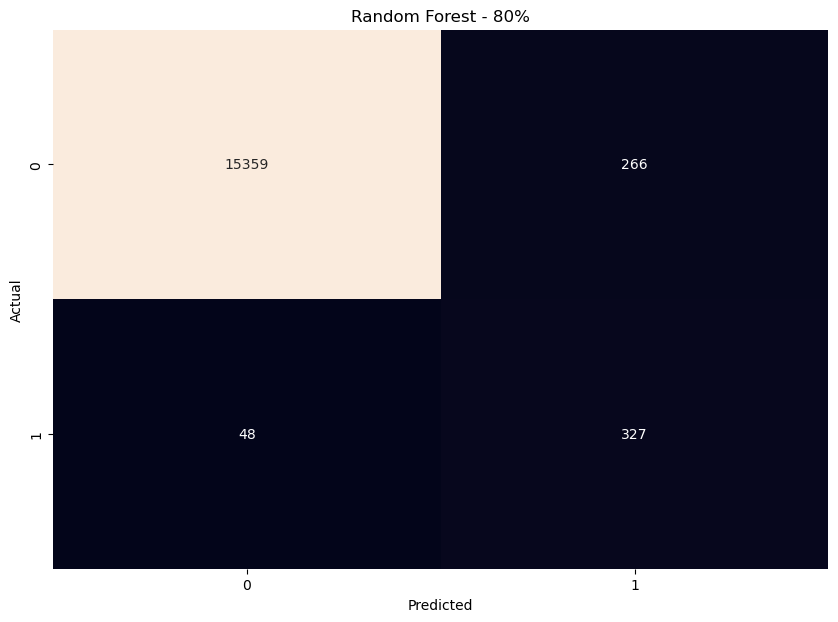


Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative               15359                 266
Actual Positive                  48                 327

Costs:
False Positives Cost (FP): $2660
True Positives Cost (TP): $8175
False Negatives Cost (FN): $24000
Total Expected Cost (EC): $34835
AUC-ROC: 0.93


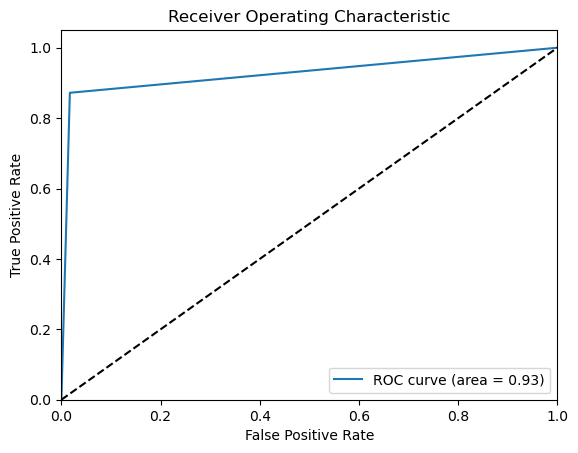

In [202]:
rf_model_80 = rf_model.fit(x_train_final_80, y_train_final_80)
y_pred_rf_80 = rf_model.predict(x_test_final_80)
print(classification_report(y_test_final_80, y_pred_rf_80))
conf_matrix(y_test_final_80, y_pred_rf_80, model_name='Random Forest - 80%')
auc_roc(y_test_final_80, y_pred_rf_80)

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     15625
         1.0       0.53      0.85      0.65       375

    accuracy                           0.98     16000
   macro avg       0.76      0.92      0.82     16000
weighted avg       0.99      0.98      0.98     16000



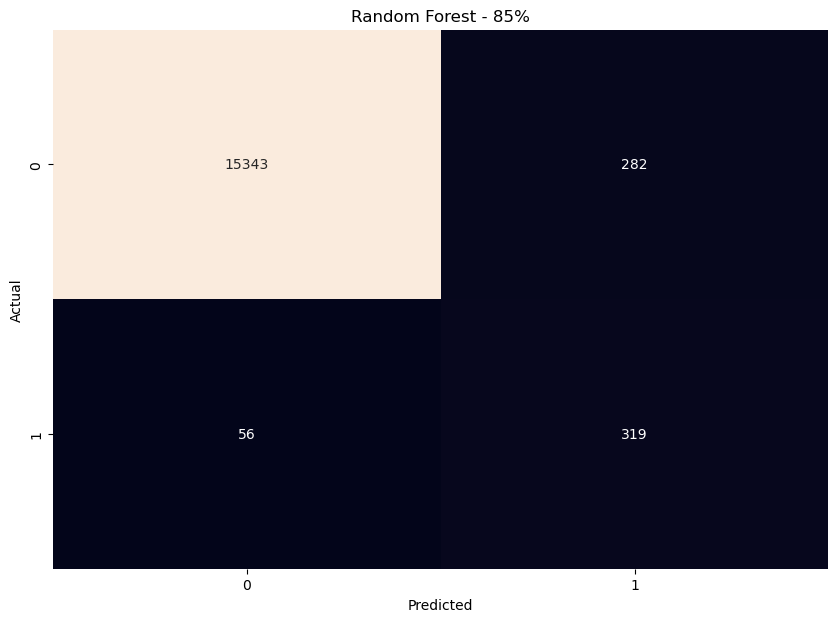


Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative               15343                 282
Actual Positive                  56                 319

Costs:
False Positives Cost (FP): $2820
True Positives Cost (TP): $7975
False Negatives Cost (FN): $28000
Total Expected Cost (EC): $38795
AUC-ROC: 0.92


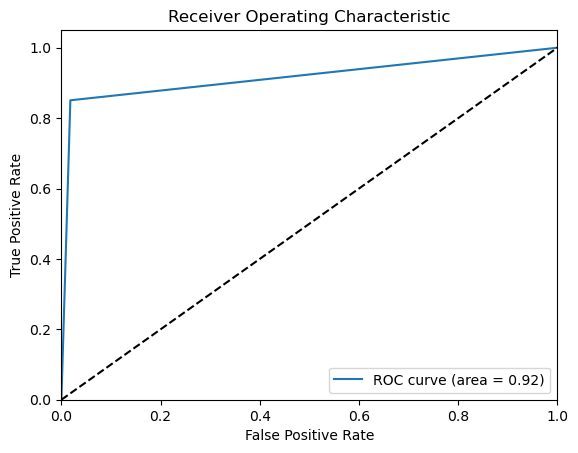

In [203]:
rf_model_85 = rf_model.fit(x_train_final_85, y_train_final_85)
y_pred_rf_85 = rf_model.predict(x_test_final_85)
print(classification_report(y_test_final_85, y_pred_rf_85))
conf_matrix(y_test_final_85, y_pred_rf_85, model_name='Random Forest - 85%')
auc_roc(y_test_final_85, y_pred_rf_85)

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     15625
         1.0       0.72      0.83      0.77       375

    accuracy                           0.99     16000
   macro avg       0.86      0.91      0.88     16000
weighted avg       0.99      0.99      0.99     16000



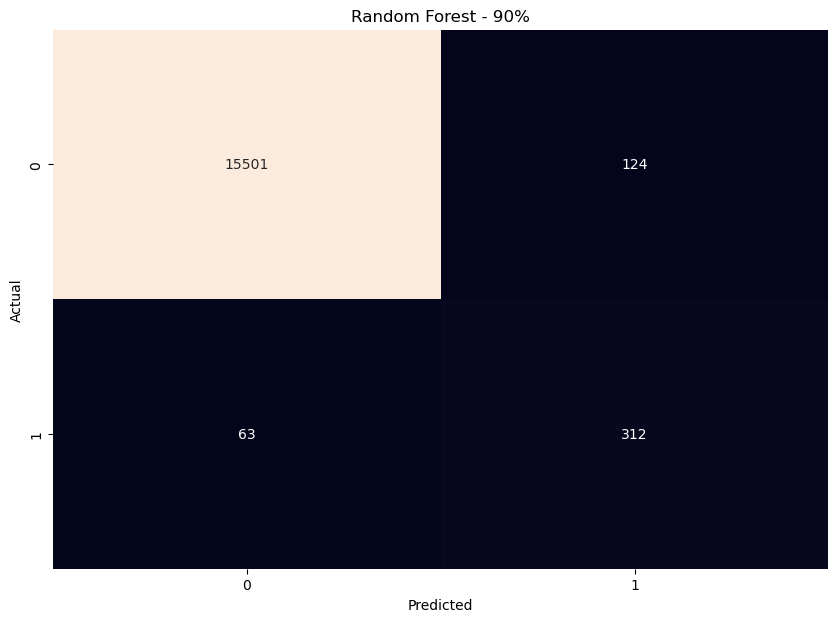


Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative               15501                 124
Actual Positive                  63                 312

Costs:
False Positives Cost (FP): $1240
True Positives Cost (TP): $7800
False Negatives Cost (FN): $31500
Total Expected Cost (EC): $40540
AUC-ROC: 0.91


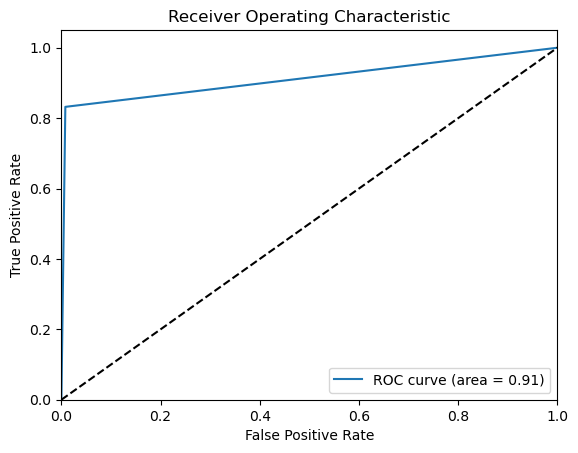

In [204]:
rf_model_90 = rf_model.fit(x_train_final_90, y_train_final_90)
y_pred_rf_90 = rf_model.predict(x_test_final_90)
print(classification_report(y_test_final_90, y_pred_rf_90))
conf_matrix(y_test_final_90, y_pred_rf_90, model_name='Random Forest - 90%')
auc_roc(y_test_final_90, y_pred_rf_90)

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     15625
         1.0       0.74      0.84      0.78       375

    accuracy                           0.99     16000
   macro avg       0.87      0.92      0.89     16000
weighted avg       0.99      0.99      0.99     16000



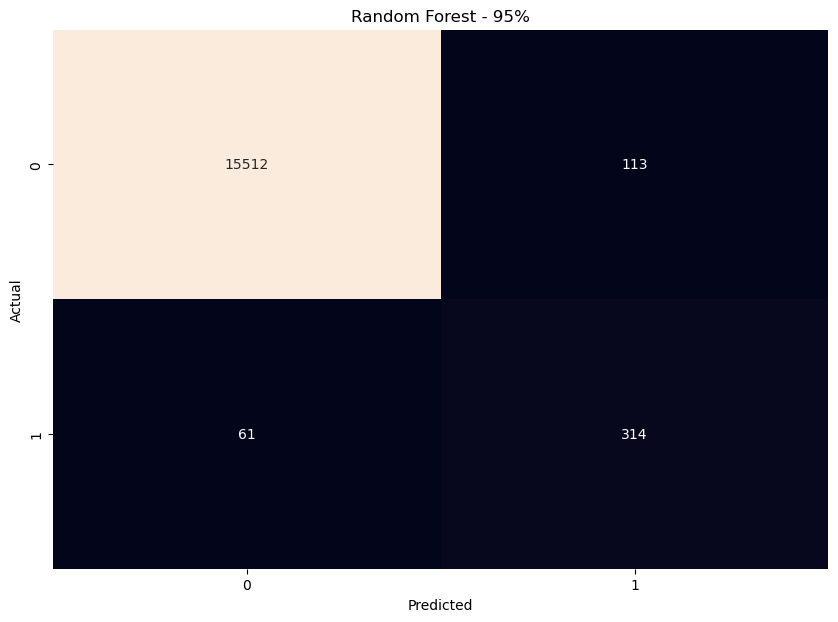


Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative               15512                 113
Actual Positive                  61                 314

Costs:
False Positives Cost (FP): $1130
True Positives Cost (TP): $7850
False Negatives Cost (FN): $30500
Total Expected Cost (EC): $39480
AUC-ROC: 0.92


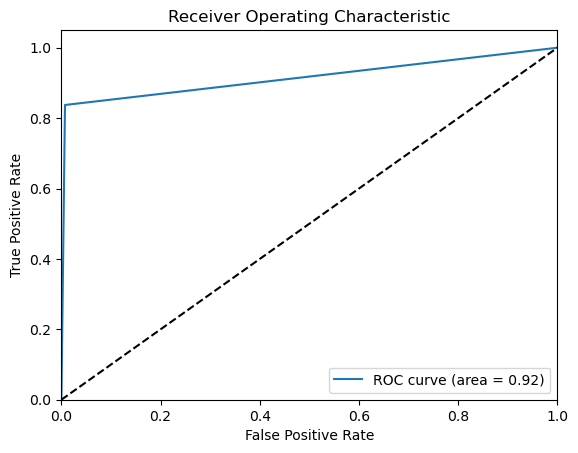

In [205]:
rf_model_95 = rf_model.fit(x_train_final_95, y_train_final_95)
y_pred_rf_95 = rf_model.predict(x_test_final_95)
print(classification_report(y_test_final_95, y_pred_rf_95))
conf_matrix(y_test_final_95, y_pred_rf_95, model_name='Random Forest - 95%')
auc_roc(y_test_final_95, y_pred_rf_95)

# LightGBM

In [161]:
lgbm_model = LGBMClassifier()

[LightGBM] [Info] Number of positive: 17700, number of negative: 59000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001852 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 76700, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.230769 -> initscore=-1.203973
[LightGBM] [Info] Start training from score -1.203973
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99     15625
         1.0       0.46      0.89      0.60       375

    accuracy                           0.97     16000
   macro avg       0.73      0.93      0.80     16000
weighted avg       0.98      0.97      0.98     16000



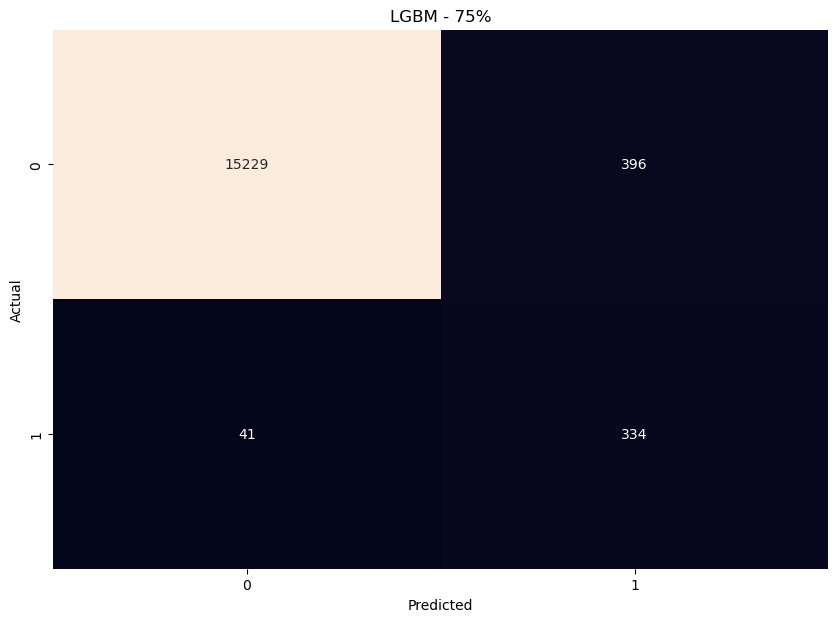


Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative               15229                 396
Actual Positive                  41                 334

Costs:
False Positives Cost (FP): $3960
True Positives Cost (TP): $8350
False Negatives Cost (FN): $20500
Total Expected Cost (EC): $32810
AUC-ROC: 0.93


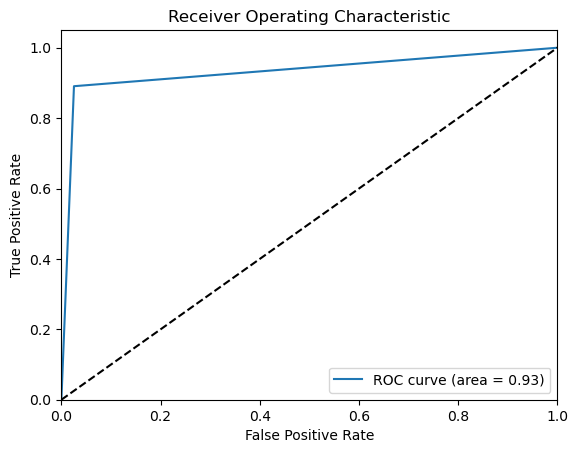

In [206]:
lgbm_model.fit(x_train_final_75, y_train_final_75)
y_pred_lgbm_75 = lgbm_model.predict(x_test_final_75)
print(classification_report(y_test_final_75, y_pred_lgbm_75))
conf_matrix(y_test_final_75, y_pred_lgbm_75, model_name='LGBM - 75%')
auc_roc(y_test_final_75, y_pred_lgbm_75)

[LightGBM] [Info] Number of positive: 17700, number of negative: 59000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002322 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5610
[LightGBM] [Info] Number of data points in the train set: 76700, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.230769 -> initscore=-1.203973
[LightGBM] [Info] Start training from score -1.203973
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     15625
         1.0       0.60      0.89      0.71       375

    accuracy                           0.98     16000
   macro avg       0.80      0.94      0.85     16000
weighted avg       0.99      0.98      0.98     16000



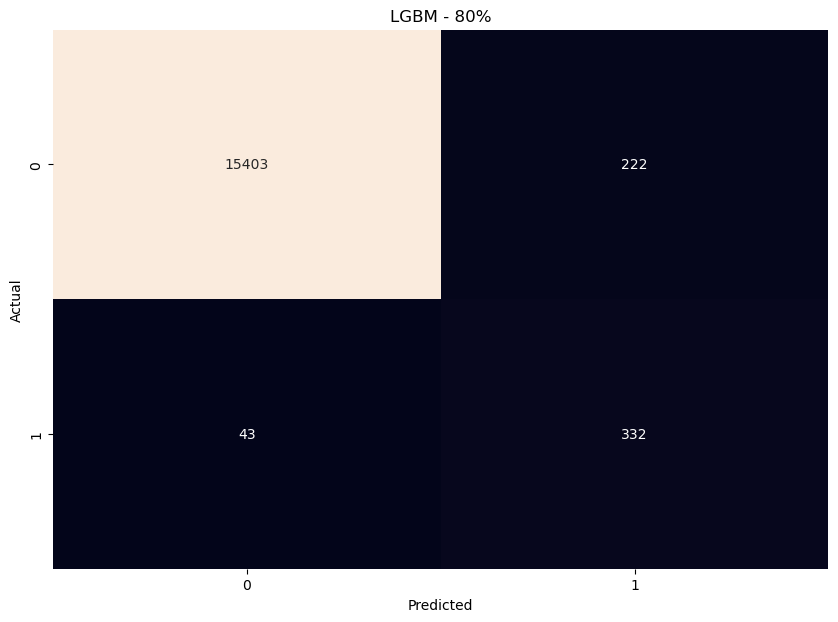


Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative               15403                 222
Actual Positive                  43                 332

Costs:
False Positives Cost (FP): $2220
True Positives Cost (TP): $8300
False Negatives Cost (FN): $21500
Total Expected Cost (EC): $32020
AUC-ROC: 0.94


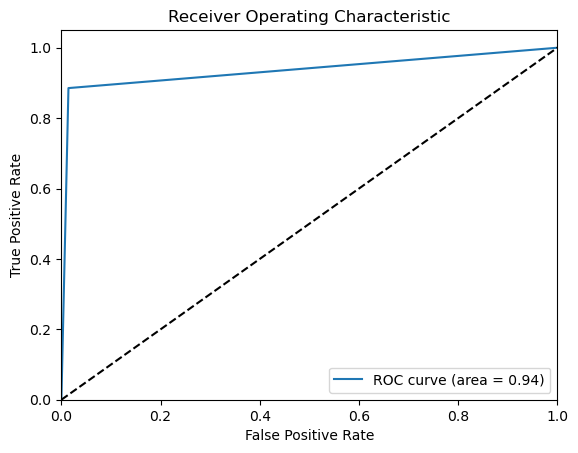

In [207]:
lgbm_model.fit(x_train_final_80, y_train_final_80)
y_pred_lgbm_80 = lgbm_model.predict(x_test_final_80)
print(classification_report(y_test_final_80, y_pred_lgbm_80))
conf_matrix(y_test_final_80, y_pred_lgbm_80, model_name='LGBM - 80%')
auc_roc(y_test_final_80, y_pred_lgbm_80)

[LightGBM] [Info] Number of positive: 17700, number of negative: 59000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005317 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 76700, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.230769 -> initscore=-1.203973
[LightGBM] [Info] Start training from score -1.203973
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     15625
         1.0       0.63      0.88      0.73       375

    accuracy                           0.98     16000
   macro avg       0.81      0.94      0.86     16000
weighted avg       0.99      0.98      0.99     16000



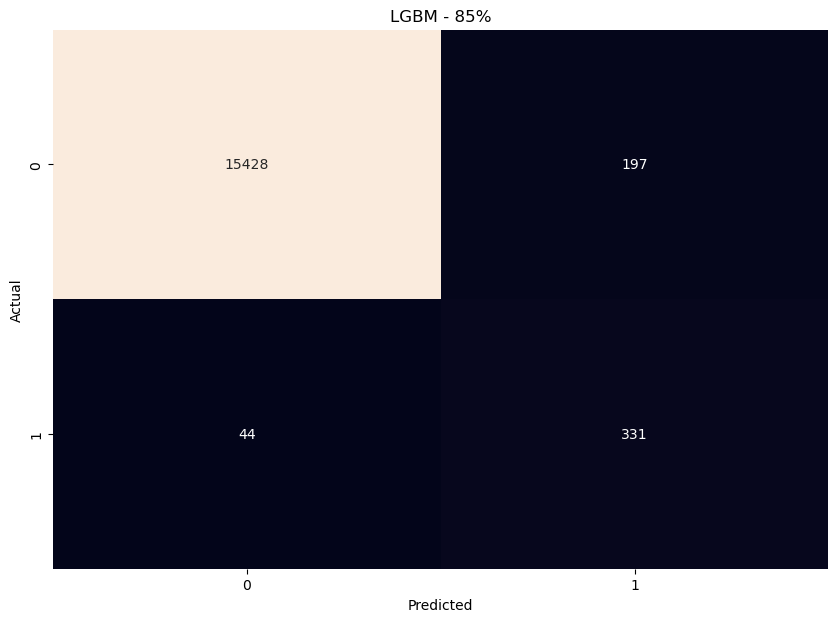


Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative               15428                 197
Actual Positive                  44                 331

Costs:
False Positives Cost (FP): $1970
True Positives Cost (TP): $8275
False Negatives Cost (FN): $22000
Total Expected Cost (EC): $32245
AUC-ROC: 0.94


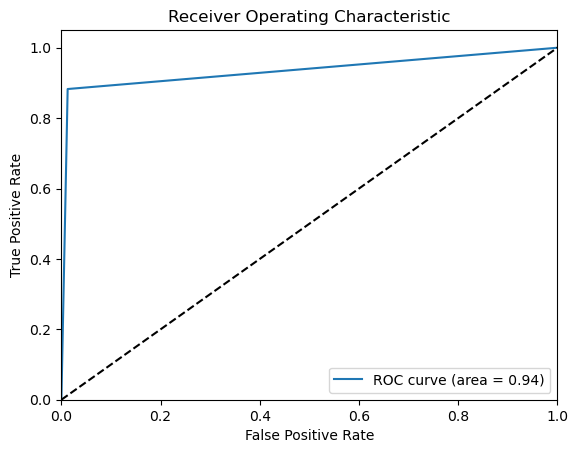

In [208]:
lgbm_model.fit(x_train_final_85, y_train_final_85)
y_pred_lgbm_85 = lgbm_model.predict(x_test_final_85)
print(classification_report(y_test_final_85, y_pred_lgbm_85))
conf_matrix(y_test_final_85, y_pred_lgbm_85, model_name='LGBM - 85%')
auc_roc(y_test_final_85, y_pred_lgbm_85)

[LightGBM] [Info] Number of positive: 17700, number of negative: 59000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008922 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10710
[LightGBM] [Info] Number of data points in the train set: 76700, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.230769 -> initscore=-1.203973
[LightGBM] [Info] Start training from score -1.203973
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     15625
         1.0       0.66      0.88      0.76       375

    accuracy                           0.99     16000
   macro avg       0.83      0.93      0.88     16000
weighted avg       0.99      0.99      0.99     16000



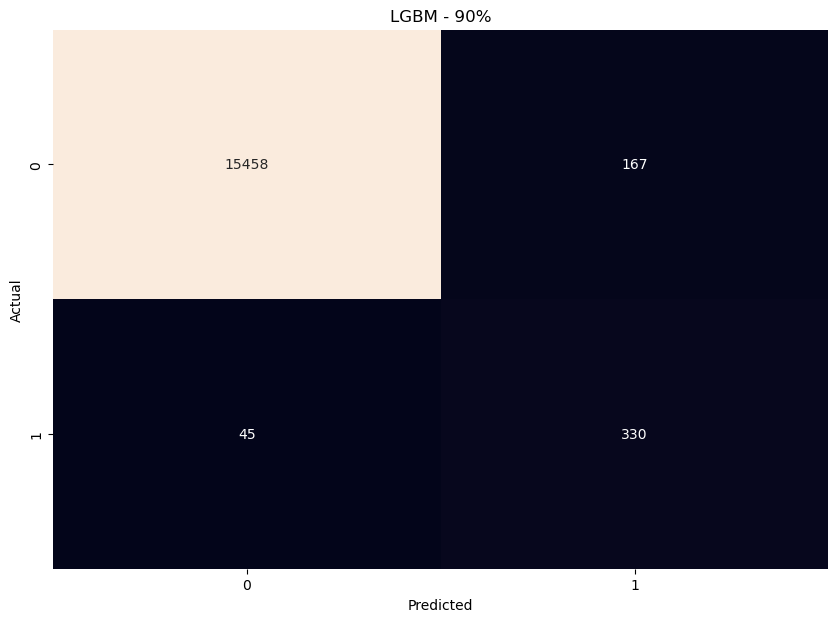


Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative               15458                 167
Actual Positive                  45                 330

Costs:
False Positives Cost (FP): $1670
True Positives Cost (TP): $8250
False Negatives Cost (FN): $22500
Total Expected Cost (EC): $32420
AUC-ROC: 0.93


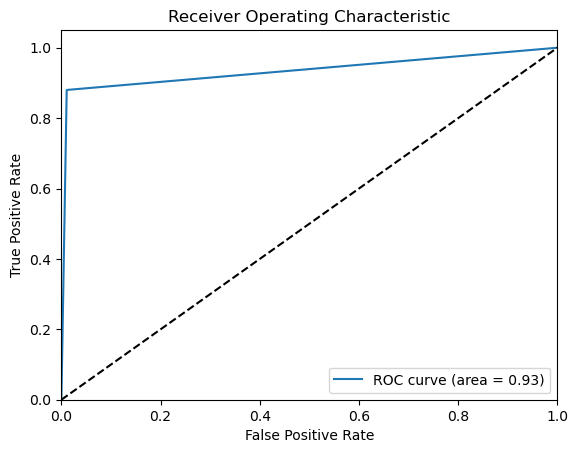

In [209]:
lgbm_model.fit(x_train_final_90, y_train_final_90)
y_pred_lgbm_90 = lgbm_model.predict(x_test_final_90)
print(classification_report(y_test_final_90, y_pred_lgbm_90))
conf_matrix(y_test_final_90, y_pred_lgbm_90, model_name='LGBM - 90%')
auc_roc(y_test_final_90, y_pred_lgbm_90)

[LightGBM] [Info] Number of positive: 17700, number of negative: 59000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010902 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16065
[LightGBM] [Info] Number of data points in the train set: 76700, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.230769 -> initscore=-1.203973
[LightGBM] [Info] Start training from score -1.203973
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     15625
         1.0       0.69      0.88      0.77       375

    accuracy                           0.99     16000
   macro avg       0.84      0.93      0.88     16000
weighted avg       0.99      0.99      0.99     16000



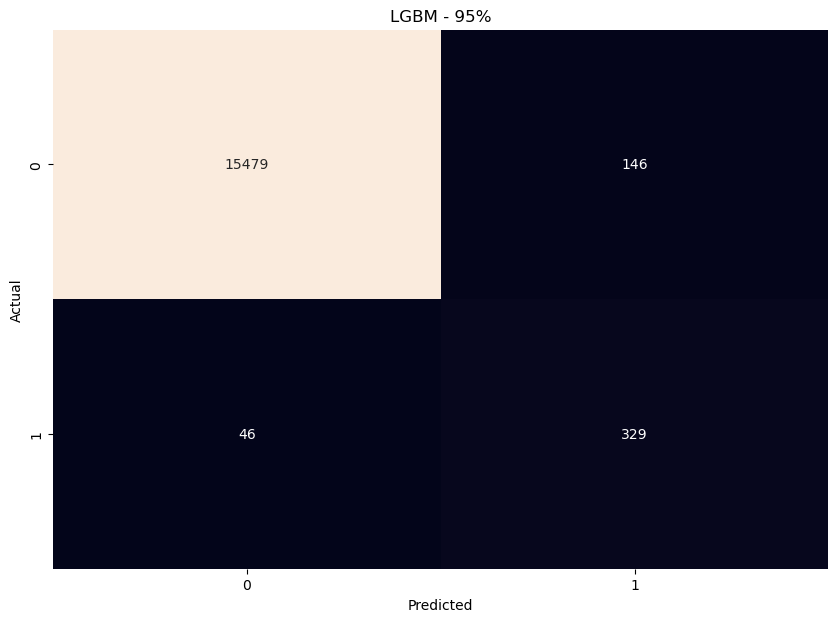


Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative               15479                 146
Actual Positive                  46                 329

Costs:
False Positives Cost (FP): $1460
True Positives Cost (TP): $8225
False Negatives Cost (FN): $23000
Total Expected Cost (EC): $32685
AUC-ROC: 0.93


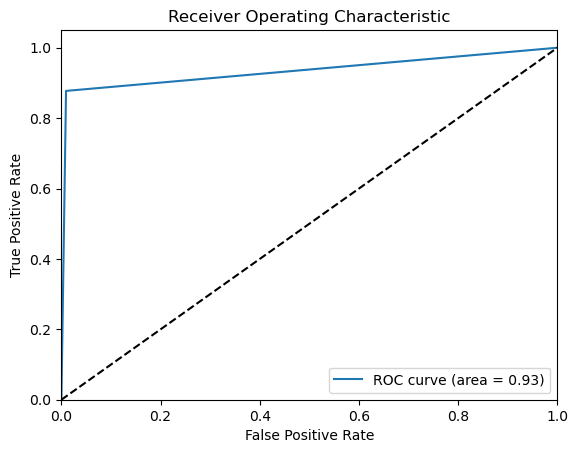

In [210]:
lgbm_model.fit(x_train_final_95, y_train_final_95)
y_pred_lgbm_95 = lgbm_model.predict(x_test_final_95)
print(classification_report(y_test_final_95, y_pred_lgbm_95))
conf_matrix(y_test_final_95, y_pred_lgbm_95, model_name='LGBM - 95%')
auc_roc(y_test_final_95, y_pred_lgbm_95)

In [167]:
def optimize_lgbm_hyperparameters(x_train, y_train, x_test, y_test, param_distributions, n_iter=100, cv=3, random_state=42, n_jobs=-1):

    model = LGBMClassifier()

    random_search = RandomizedSearchCV(
        model, 
        param_distributions=param_distributions,
        n_iter=n_iter,
        scoring='accuracy',
        cv=cv,
        random_state=random_state,
        n_jobs=n_jobs,
        verbose=1
    )

    random_search.fit(x_train, y_train)

    best_model = random_search.best_estimator_

    y_pred = best_model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"Melhor acurácia: {accuracy}")
    print(f"Melhores hiperparâmetros: {random_search.best_params_}")

    return best_model, random_search.best_params_, random_search.best_score_

In [168]:
def optimize_lgbm_hyperparameters_bayes(X_train, y_train, X_test, y_test, init_points=10, n_iter=30, random_state=42):

    def lgb_eval(num_leaves, max_depth, learning_rate, n_estimators, min_child_samples, subsample, colsample_bytree, reg_alpha, reg_lambda):
        params = {
            'num_leaves': int(num_leaves),
            'max_depth': int(max_depth),
            'learning_rate': learning_rate,
            'n_estimators': int(n_estimators),
            'min_child_samples': int(min_child_samples),
            'subsample': subsample,
            'colsample_bytree': colsample_bytree,
            'reg_alpha': reg_alpha,
            'reg_lambda': reg_lambda,
            'objective': 'binary'
        }
        
        model = LGBMClassifier(**params, random_state=random_state)
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        
        return accuracy

    pbounds = {
        'num_leaves': (20, 200),
        'max_depth': (-1, 50),
        'learning_rate': (0.005, 0.2),
        'n_estimators': (50, 1000),
        'min_child_samples': (5, 100),
        'subsample': (0.5, 1.0),
        'colsample_bytree': (0.5, 1.0),
        'reg_alpha': (0.0, 1.0),
        'reg_lambda': (0.0, 1.0)
    }

    optimizer = BayesianOptimization(
        f=lgb_eval,
        pbounds=pbounds,
        random_state=random_state,
        verbose=2
    )

    optimizer.maximize(init_points=init_points, n_iter=n_iter)

    best_params = optimizer.max['params']
    best_params['num_leaves'] = int(best_params['num_leaves'])
    best_params['max_depth'] = int(best_params['max_depth'])
    best_params['n_estimators'] = int(best_params['n_estimators'])
    best_params['min_child_samples'] = int(best_params['min_child_samples'])

    best_model = LGBMClassifier(**best_params, random_state=random_state)
    best_model.fit(X_train, y_train)

    y_pred = best_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"Melhor acurácia: {accuracy}")
    print(f"Melhores hiperparâmetros: {best_params}")

    return best_model, best_params, accuracy

In [169]:
param_distributions = {
    'num_leaves': [31, 50, 100, 150, 200],
    'max_depth': [-1, 5, 10, 15, 20, 25, 30, 35, 40, 50],
    'learning_rate': [0.005, 0.01, 0.05, 0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'min_child_samples': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0],
    'reg_lambda': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0]
}


In [170]:
optimize_lgbm_hyperparameters_bayes(x_train_final_75, y_train_final_75, x_test_final_75, y_test_final_75)

|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
[LightGBM] [Info] Number of positive: 17700, number of negative: 59000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002674 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 76700, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.230769 -> initscore=-1.203973
[LightGBM] [Info] Start training from score -1.203973
| 1         | 0.9724    | 0.6873    | 0.1904    | 36.33     | 61.87     | 198.2     | 48.08     | 0.05808   | 0.8662    | 0.8006    |
[LightGBM] [Info] Number of positive: 17700, number of negative: 59000
[LightGBM] [Info] Auto-choosing c

(LGBMClassifier(colsample_bytree=0.5, learning_rate=0.005, max_depth=46,
                min_child_samples=44, n_estimators=166, num_leaves=127,
                random_state=42, subsample=0.5),
 {'colsample_bytree': 0.5,
  'learning_rate': 0.005,
  'max_depth': 46,
  'min_child_samples': 44,
  'n_estimators': 166,
  'num_leaves': 127,
  'reg_alpha': 0.0,
  'reg_lambda': 0.0,
  'subsample': 0.5},
 0.9860625)

[LightGBM] [Info] Number of positive: 17700, number of negative: 59000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002793 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 76700, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.230769 -> initscore=-1.203973
[LightGBM] [Info] Start training from score -1.203973
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

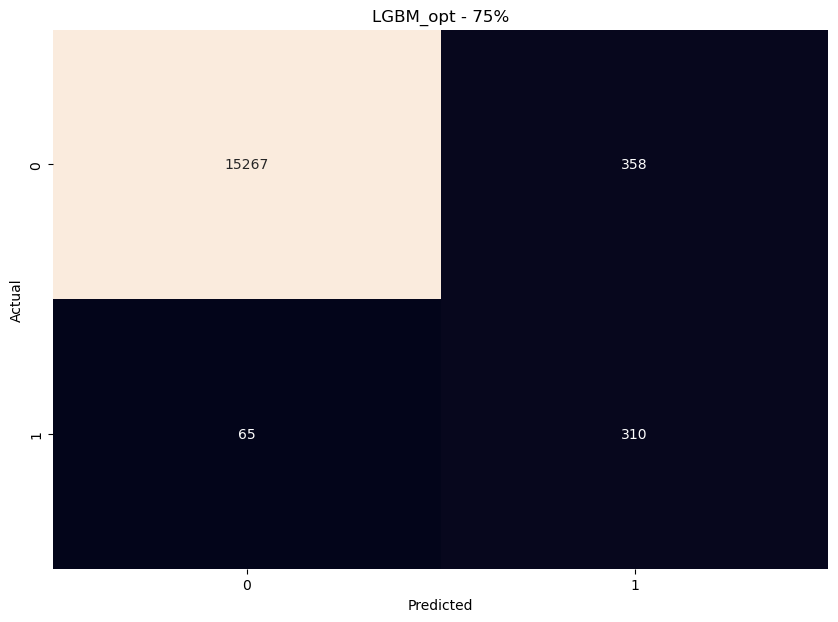


Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative               15267                 358
Actual Positive                  65                 310

Costs:
False Positives Cost (FP): $3580
True Positives Cost (TP): $7750
False Negatives Cost (FN): $32500
Total Expected Cost (EC): $43830
AUC-ROC: 0.90


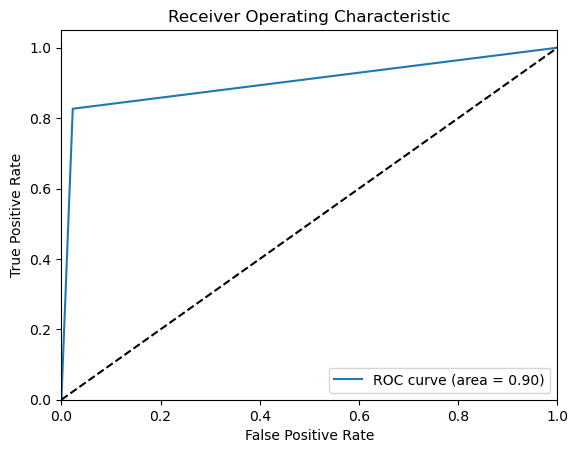

In [211]:
lgbm_model_opt_75 = LGBMClassifier(colsample_bytree=0.8150108693051521, learning_rate=0.06545915884590255, max_depth=49, min_child_samples=88, n_estimators=791, num_leaves=98, reg_alpha=0.356571005452735, reg_lambda=0.020647411184577153, subsample=0.5131761563192082)
lgbm_model_opt_75.fit(x_train_final_75, y_train_final_75)
y_pred_lgbm_75_opt = lgbm_model_opt_75.predict(x_test_final_75)
print(classification_report(y_test_final_75, y_pred_lgbm_75_opt))
conf_matrix(y_test_final_75, y_pred_lgbm_75_opt, model_name='LGBM_opt - 75%')
auc_roc(y_test_final_75, y_pred_lgbm_75_opt)

In [172]:
optimize_lgbm_hyperparameters(x_train_final_85, y_train_final_85, x_test_final_85, y_test_final_85, param_distributions)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[LightGBM] [Info] Number of positive: 17700, number of negative: 59000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005718 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 76700, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.230769 -> initscore=-1.203973
[LightGBM] [Info] Start training from score -1.203973
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

(LGBMClassifier(colsample_bytree=0.8, learning_rate=0.2, max_depth=20,
                min_child_samples=90, n_estimators=500, num_leaves=200,
                subsample=0.6),
 {'subsample': 0.6,
  'reg_lambda': 0.0,
  'reg_alpha': 0.0,
  'num_leaves': 200,
  'n_estimators': 500,
  'min_child_samples': 90,
  'max_depth': 20,
  'learning_rate': 0.2,
  'colsample_bytree': 0.8},
 0.9921903523581789)

[LightGBM] [Info] Number of positive: 17700, number of negative: 59000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005376 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 76700, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.230769 -> initscore=-1.203973
[LightGBM] [Info] Start training from score -1.203973
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

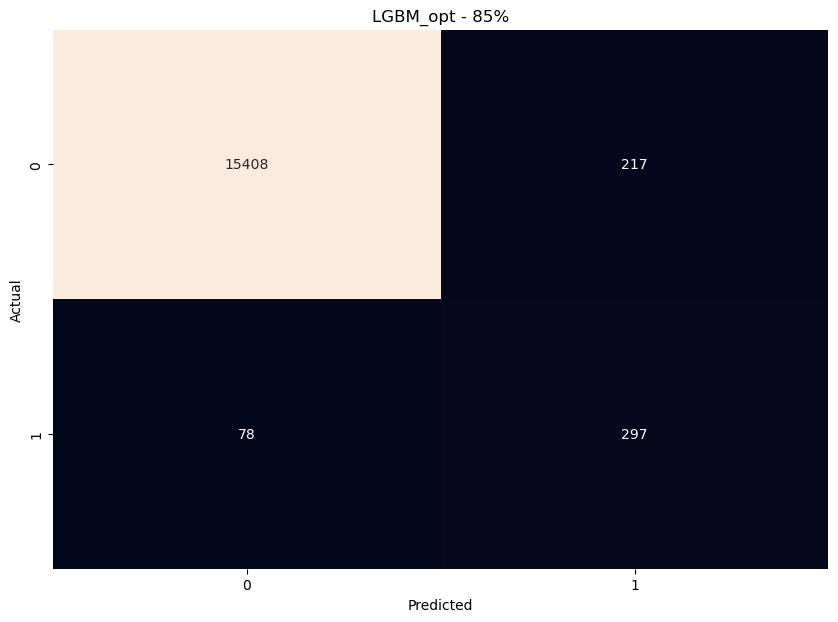


Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative               15408                 217
Actual Positive                  78                 297

Costs:
False Positives Cost (FP): $2170
True Positives Cost (TP): $7425
False Negatives Cost (FN): $39000
Total Expected Cost (EC): $48595
AUC-ROC: 0.89


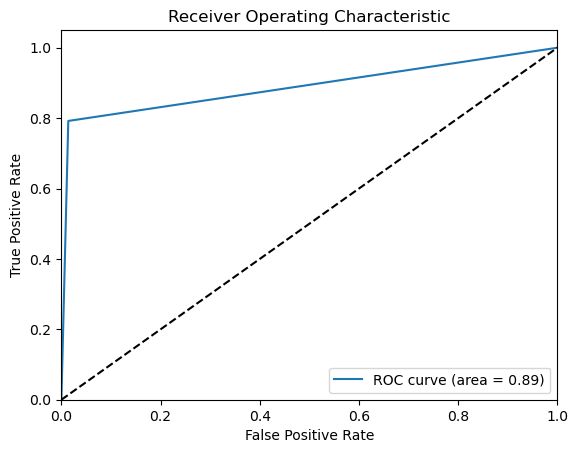

In [212]:
lgbm_model_opt_85 = LGBMClassifier(subsample=0.7, reg_lambda=0.0, reg_alpha=0.0, num_leaves=150, n_estimators=600, min_child_samples=80, max_depth=35, learning_rate=0.3, colsample_bytree=0.8)
lgbm_model_opt_85.fit(x_train_final_85, y_train_final_85)
y_pred_lgbm_85_opt = lgbm_model_opt_85.predict(x_test_final_85)
print(classification_report(y_test_final_85, y_pred_lgbm_85_opt))
conf_matrix(y_test_final_85, y_pred_lgbm_85_opt, model_name='LGBM_opt - 85%')
auc_roc(y_test_final_85, y_pred_lgbm_85_opt)